Selected Hyperparameters for MFCC:
Fold 1: {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Fold 2: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Fold 3: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Fold 4: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Fold 5: {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Mean Training Time for MFCC: 5.0074 seconds
Mean Testing Time for MFCC: 0.6038 seconds


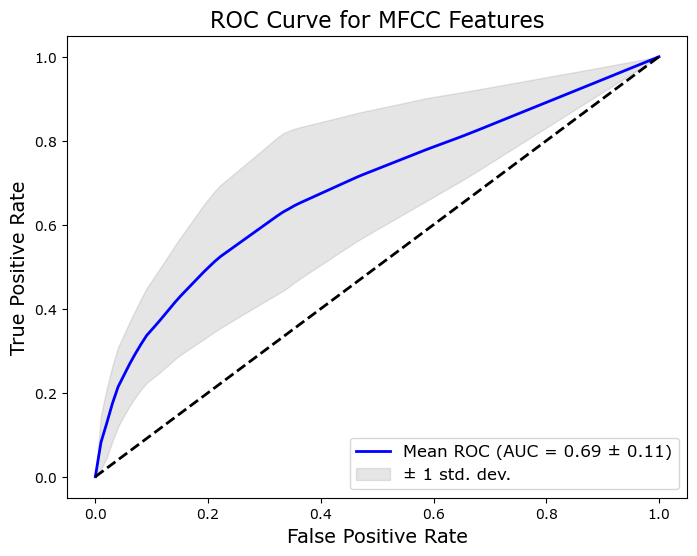

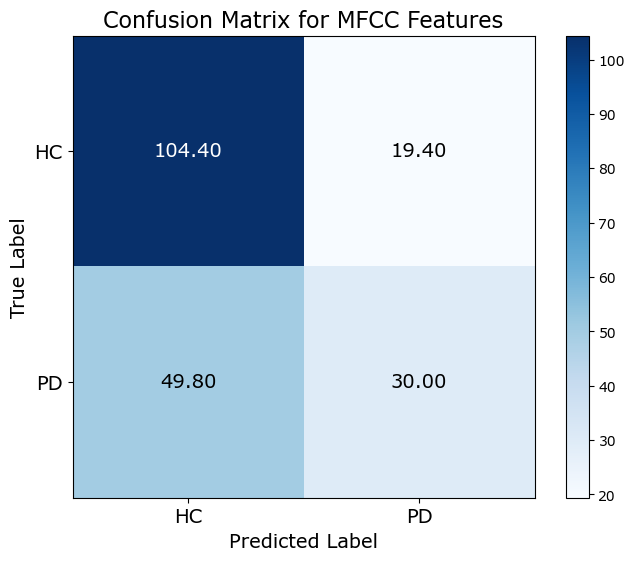

Selected Hyperparameters for Spectrogram:
Fold 1: {'n_neighbors': 40, 'p': 1, 'weights': 'distance'}
Fold 2: {'n_neighbors': 24, 'p': 2, 'weights': 'uniform'}
Fold 3: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Fold 4: {'n_neighbors': 36, 'p': 2, 'weights': 'uniform'}
Fold 5: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Mean Training Time for Spectrogram: 1.2974 seconds
Mean Testing Time for Spectrogram: 0.0270 seconds


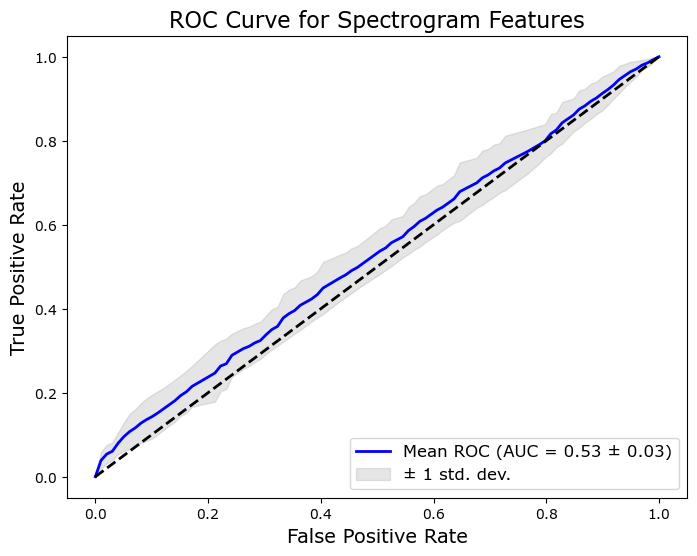

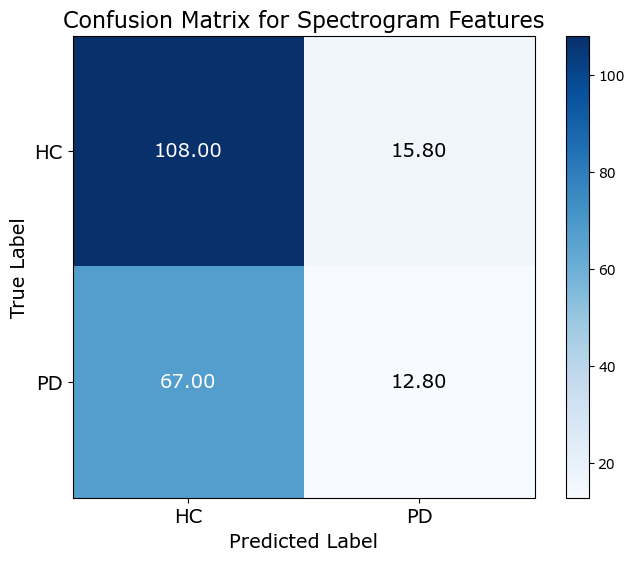

Selected Hyperparameters for Spectral:
Fold 1: {'n_neighbors': 47, 'p': 2, 'weights': 'uniform'}
Fold 2: {'n_neighbors': 45, 'p': 2, 'weights': 'uniform'}
Fold 3: {'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
Fold 4: {'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
Fold 5: {'n_neighbors': 45, 'p': 2, 'weights': 'uniform'}
Mean Training Time for Spectral: 1.3359 seconds
Mean Testing Time for Spectral: 0.0354 seconds


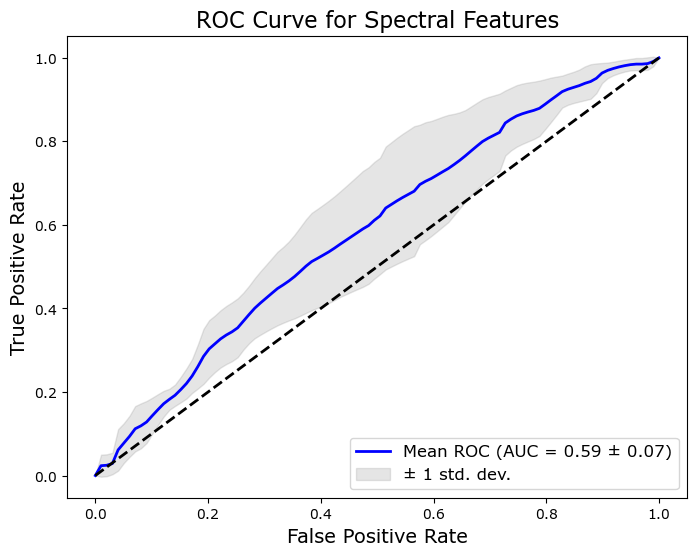

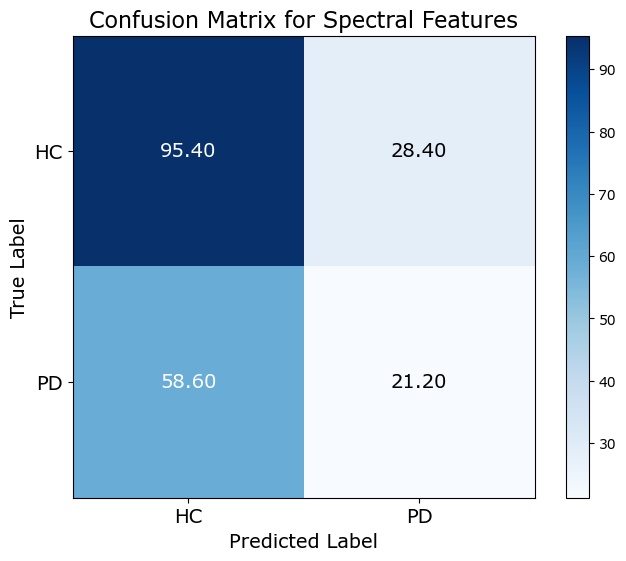

Selected Hyperparameters for Voice_Quality:
Fold 1: {'n_neighbors': 24, 'p': 2, 'weights': 'uniform'}
Fold 2: {'n_neighbors': 47, 'p': 2, 'weights': 'uniform'}
Fold 3: {'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
Fold 4: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Fold 5: {'n_neighbors': 47, 'p': 2, 'weights': 'uniform'}
Mean Training Time for Voice_Quality: 1.4215 seconds
Mean Testing Time for Voice_Quality: 0.0320 seconds


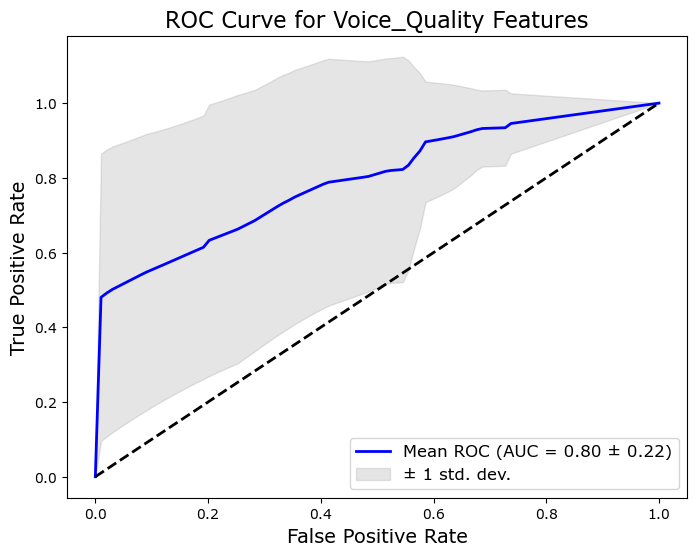

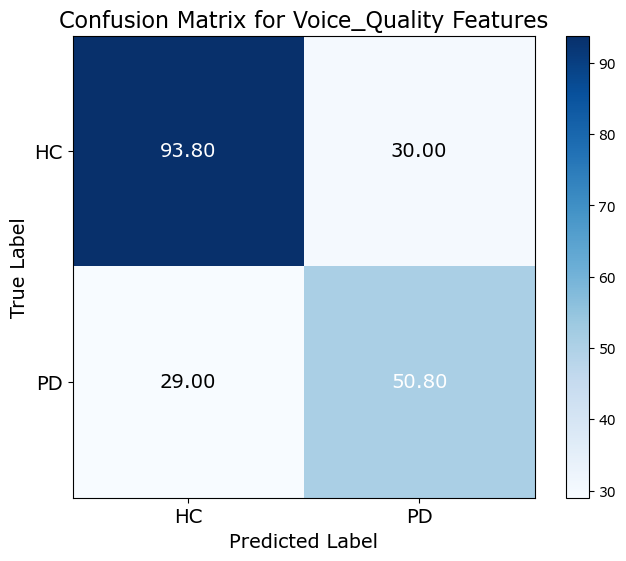

Selected Hyperparameters for All_Features:
Fold 1: {'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
Fold 2: {'n_neighbors': 45, 'p': 2, 'weights': 'uniform'}
Fold 3: {'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
Fold 4: {'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
Fold 5: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Mean Training Time for All_Features: 1.5896 seconds
Mean Testing Time for All_Features: 0.1088 seconds


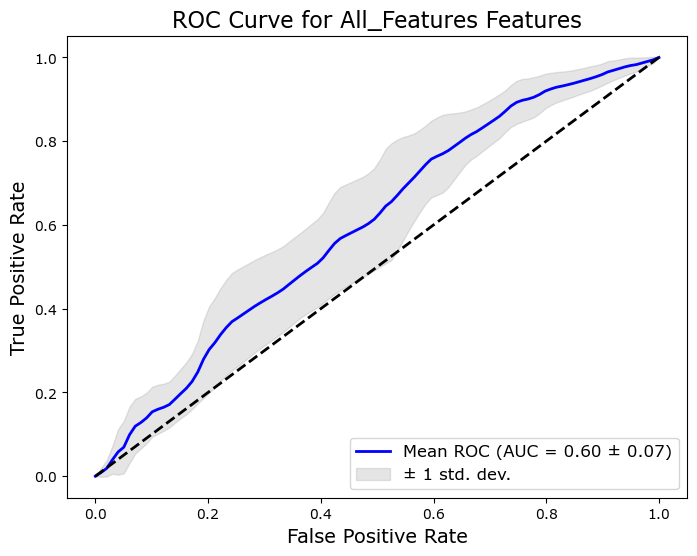

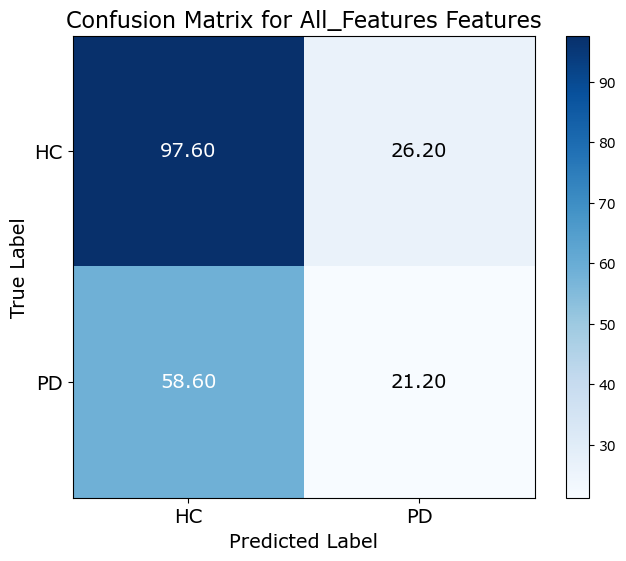

     Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.660012        0.636491     0.375918  0.458844   
1    Spectrogram       0.593359        0.480784     0.160411  0.226867   
2       Spectral       0.572617        0.447707     0.265601  0.325012   
3  Voice_Quality       0.710050        0.732947     0.636867  0.637140   
4   All_Features       0.583435        0.459683     0.265570  0.329589   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.686879  0.260237       4.025164          0.235576  0.339988  ...   
1      0.528885  0.056739       1.120987          0.038352  0.406641  ...   
2      0.588093  0.048536       0.712947          0.041024  0.427383  ...   
3      0.796320  0.451291       4.431271          0.404670  0.289950  ...   
4      0.598813  0.066781       1.195150          0.059097  0.416565  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.099786         0.110

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef, log_loss, cohen_kappa_score, mean_absolute_error, roc_curve
)
from scipy.stats import randint

# Load the CSV file with extracted features
csv_output_path = r'E:\DATASET MDVR IMG ALL\EXPERIMENT\Integeral\enhanced_integral_feature_data1.csv'
data = pd.read_csv(csv_output_path)

# Remove any rows with null values
data.dropna(inplace=True)

# Extract patient ID from file_name
def extract_patient_id(file_name):
    return file_name.split('_')[0]  # Extract the patient ID (e.g., ID00)

# Add a 'group' column based on patient ID
data['group'] = data['file_name'].apply(extract_patient_id)

# Define feature groups based on feature types
feature_groups = {
    'MFCC': ['mfcc_1', 'mfcc_delta_1', 'mfcc_delta2_1', 'mfcc_2', 'mfcc_delta_2', 'mfcc_delta2_2', 
             'mfcc_3', 'mfcc_delta_3', 'mfcc_delta2_3', 'mfcc_4', 'mfcc_delta_4', 'mfcc_delta2_4', 
             'mfcc_5', 'mfcc_delta_5', 'mfcc_delta2_5', 'mfcc_6', 'mfcc_delta_6', 'mfcc_delta2_6', 
             'mfcc_7', 'mfcc_delta_7', 'mfcc_delta2_7', 'mfcc_8', 'mfcc_delta_8', 'mfcc_delta2_8', 
             'mfcc_9', 'mfcc_delta_9', 'mfcc_delta2_9', 'mfcc_10', 'mfcc_delta_10', 'mfcc_delta2_10', 
             'mfcc_11', 'mfcc_delta_11', 'mfcc_delta2_11', 'mfcc_12', 'mfcc_delta_12', 'mfcc_delta2_12', 
             'mfcc_13', 'mfcc_delta_13', 'mfcc_delta2_13', 'entropy', 'kurtosis', 'skewness'],
    'Spectrogram': ['mel_spectrogram', 'chroma_stft', 'entropy', 'kurtosis', 'skewness'],
    'Spectral': ['rmse', 'spectral_contrast', 'spectral_flatness', 'spectral_centroid', 
                 'spectral_bandwidth', 'spectral_rolloff', 'zcr', 'entropy', 'kurtosis', 'skewness'],
    'Voice_Quality': ['jitter_local', 'shimmer_local', 'f0_mean', 'hnr', 'entropy', 'kurtosis', 'skewness']
}

# Add a new feature group that combines all features
feature_groups['All_Features'] = list(set().union(*[features for features in feature_groups.values()]))

# Parameter grid for RandomizedSearchCV (KNN)
param_dist = {
    'n_neighbors': randint(1, 50),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2],  # 1: Manhattan distance, 2: Euclidean distance
}

# Store results for comparison
results = []

# Loop through each feature group
for group_name, features in feature_groups.items():
    X = data[features]
    y = data['label']
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=5)
    
    # Store metrics for each fold
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
        'mcc': [],
        'log_loss': [],
        'cohen_kappa': [],
        'mae': [],
        'specificity': [],
        'training_time': [],  # Store training time for each fold
        'testing_time': []   # Store testing time for each fold
    }
    
    # For ROC curve
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # For confusion matrix
    conf_matrices = []
    
    # For storing selected hyperparameters
    selected_params = []
    
    # Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Initialize the classifier with RandomizedSearchCV (KNN)
        clf = KNeighborsClassifier()
        random_search = RandomizedSearchCV(
            estimator=clf, param_distributions=param_dist, n_iter=50,
            scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
        )
        
        # Measure training time
        start_train_time = time.time()
        random_search.fit(X_train, y_train)
        end_train_time = time.time()
        training_time = end_train_time - start_train_time
        fold_metrics['training_time'].append(training_time)
        
        best_clf = random_search.best_estimator_
        
        # Store selected hyperparameters
        selected_params.append(random_search.best_params_)
        
        # Measure testing time
        start_test_time = time.time()
        y_pred = best_clf.predict(X_val)
        y_pred_proba = best_clf.predict_proba(X_val)[:, 1]
        end_test_time = time.time()
        testing_time = end_test_time - start_test_time
        fold_metrics['testing_time'].append(testing_time)
        
        # Calculate performance metrics
        fold_metrics['accuracy'].append(accuracy_score(y_val, y_pred))
        fold_metrics['precision'].append(precision_score(y_val, y_pred))
        fold_metrics['recall'].append(recall_score(y_val, y_pred))
        fold_metrics['f1'].append(f1_score(y_val, y_pred))
        fold_metrics['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
        fold_metrics['mcc'].append(matthews_corrcoef(y_val, y_pred))
        fold_metrics['log_loss'].append(log_loss(y_val, y_pred_proba))
        fold_metrics['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))
        fold_metrics['mae'].append(mean_absolute_error(y_val, y_pred))
        
        # Calculate specificity
        conf_matrix = confusion_matrix(y_val, y_pred)
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        fold_metrics['specificity'].append(specificity)
        
        # Store confusion matrix
        conf_matrices.append(conf_matrix)
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_val, y_pred_proba))
    
    # Calculate mean and std dev of performance metrics
    mean_metrics = {k: np.mean(v) for k, v in fold_metrics.items()}
    std_metrics = {k: np.std(v) for k, v in fold_metrics.items()}
    
    # Store results for this feature group
    results.append({
        'Feature Set': group_name,
        **{f'Mean {k}': v for k, v in mean_metrics.items()},
        **{f'Std Dev {k}': v for k, v in std_metrics.items()},
        'Selected Hyperparameters': selected_params  # Add selected hyperparameters
    })
    
    # Print selected hyperparameters for this feature group
    print(f"Selected Hyperparameters for {group_name}:")
    for fold, params in enumerate(selected_params, 1):
        print(f"Fold {fold}: {params}")
    
    # Print mean training and testing time
    print(f"Mean Training Time for {group_name}: {mean_metrics['training_time']:.4f} seconds")
    print(f"Mean Testing Time for {group_name}: {mean_metrics['testing_time']:.4f} seconds")
    
    # Plot mean ROC curve with std dev
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)
    plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='grey', alpha=0.2, label='± 1 std. dev.')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {group_name} Features', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()
    
    # Plot mean confusion matrix with values
    mean_conf_matrix = np.mean(conf_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    plt.imshow(mean_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {group_name} Features', fontsize=16)
    plt.colorbar()
    plt.xticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.yticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    # Add text annotations for the confusion matrix values
    thresh = mean_conf_matrix.max() / 2.  # Threshold for text color
    for i in range(mean_conf_matrix.shape[0]):
        for j in range(mean_conf_matrix.shape[1]):
            plt.text(j, i, f"{mean_conf_matrix[i, j]:.2f}",
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if mean_conf_matrix[i, j] > thresh else "black",
                     fontsize=14)

    plt.show()

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('feature_comparison_results_with_DI_knn.csv', index=False)

In [2]:
import pandas as pd

# Define the path to the CSV file
csv_output_path = r'feature_comparison_results_with_DI_knn.csv'

# Load the data
data = pd.read_csv(csv_output_path)

data

Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.660012        0.636491     0.375918  0.458844   
1    Spectrogram       0.593359        0.480784     0.160411  0.226867   
2       Spectral       0.572617        0.447707     0.265601  0.325012   
3  Voice_Quality       0.710050        0.732947     0.636867  0.637140   
4   All_Features       0.583435        0.459683     0.265570  0.329589   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.686879  0.260237       4.025164          0.235576  0.339988  ...   
1      0.528885  0.056739       1.120987          0.038352  0.406641  ...   
2      0.588093  0.048536       0.712947          0.041024  0.427383  ...   
3      0.796320  0.451291       4.431271          0.404670  0.289950  ...   
4      0.598813  0.066781       1.195150          0.059097  0.416565  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.099786         0.110151     0.143959          2.385656   
1    0.071983         0.031946     0.071455          0.630069   
2    0.037538         0.071242     0.078080          0.060719   
3    0.242567         0.215124     0.417666          3.826649   
4    0.054483         0.066786     0.071645          1.001691   

   Std Dev cohen_kappa  Std Dev mae  Std Dev specificity  \
0             0.138669     0.066452             0.098823   
1             0.052682     0.036744             0.096761   
2             0.073375     0.050222             0.109663   
3             0.414455     0.207153             0.288801   
4             0.068361     0.041254             0.087355   

   Std Dev training_time  Std Dev testing_time  \
0               6.465862              0.930810   
1               0.277281              0.013591   
2               0.183847              0.013223   
3               0.274107              0.019958   
4               0.090231              0.073593   

                            Selected Hyperparameters  
0  [{'n_neighbors': 4, 'p': 2, 'weights': 'unifor...  
1  [{'n_neighbors': 40, 'p': 1, 'weights': 'dista...  
2  [{'n_neighbors': 47, 'p': 2, 'weights': 'unifo...  
3  [{'n_neighbors': 24, 'p': 2, 'weights': 'unifo...  
4  [{'n_neighbors': 45, 'p': 1, 'weights': 'unifo...  

[5 rows x 26 columns]

Selected Hyperparameters for MFCC:
Fold 1: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 356}
Fold 2: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 267}
Fold 3: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 162}
Fold 4: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 17, 'n_estimators': 148}
Fold 5: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 162}
Mean Training Time for MFCC: 278.0135 seconds
Mean Testing Time for MFCC: 0.1222 seconds


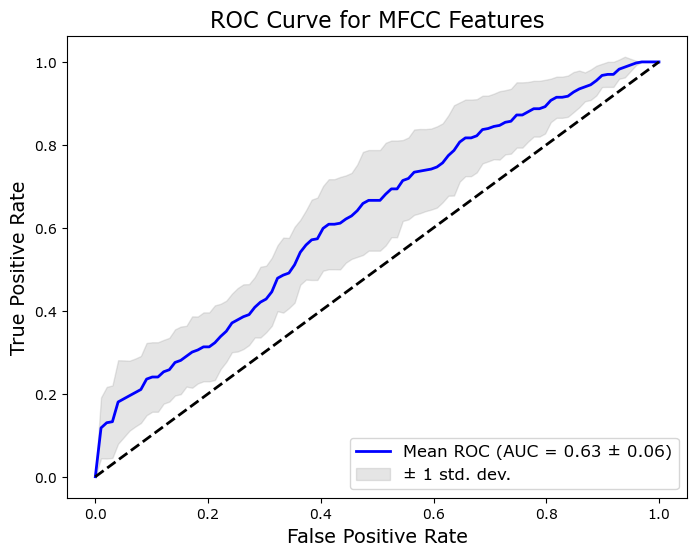

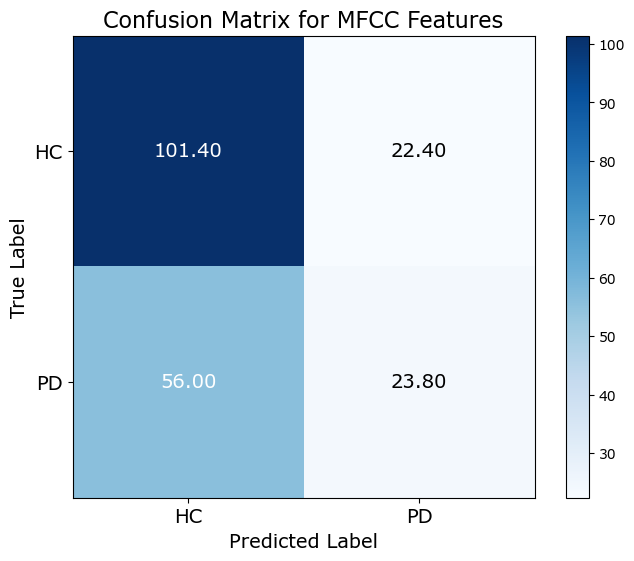

Selected Hyperparameters for Spectrogram:
Fold 1: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 18, 'n_estimators': 51}
Fold 2: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 93}
Fold 3: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 237}
Fold 4: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 274}
Fold 5: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 276}
Mean Training Time for Spectrogram: 127.9065 seconds
Mean Testing Time for Spectrogram: 0.1039 seconds


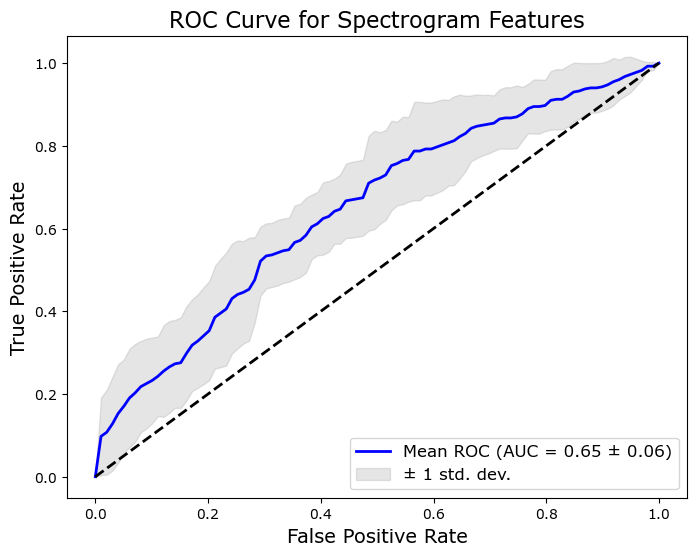

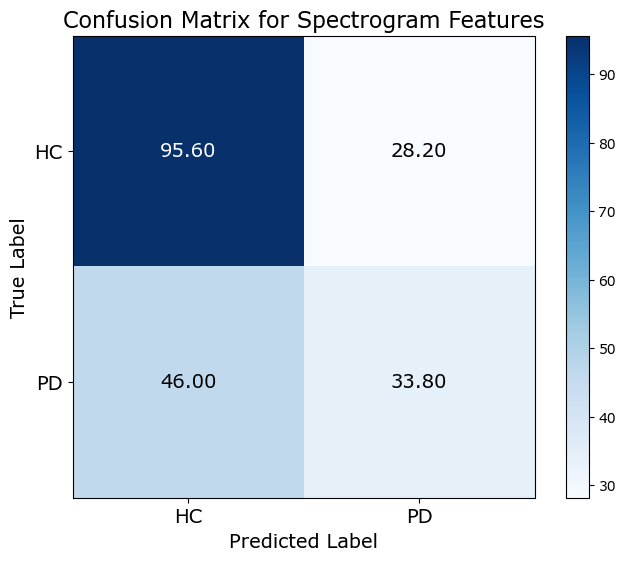

Selected Hyperparameters for Spectral:
Fold 1: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 137}
Fold 2: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 18, 'n_estimators': 51}
Fold 3: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 13, 'min_samples_split': 8, 'n_estimators': 290}
Fold 4: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 121}
Fold 5: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 276}
Mean Training Time for Spectral: 165.5346 seconds
Mean Testing Time for Spectral: 0.1201 seconds


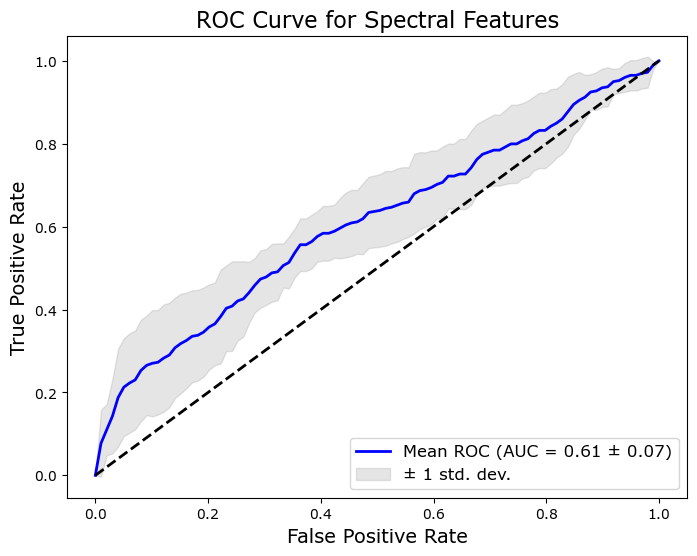

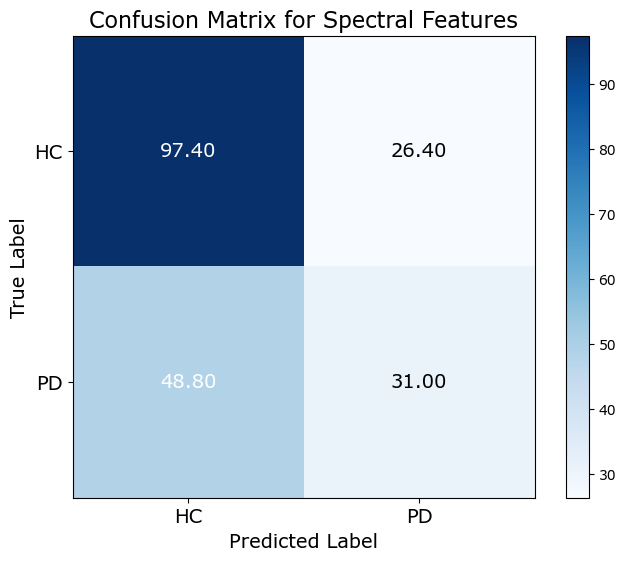

Selected Hyperparameters for Voice_Quality:
Fold 1: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 162}
Fold 2: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 137}
Fold 3: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 19, 'min_samples_split': 18, 'n_estimators': 441}
Fold 4: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 162}
Fold 5: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 267}
Mean Training Time for Voice_Quality: 77.4948 seconds
Mean Testing Time for Voice_Quality: 0.0739 seconds


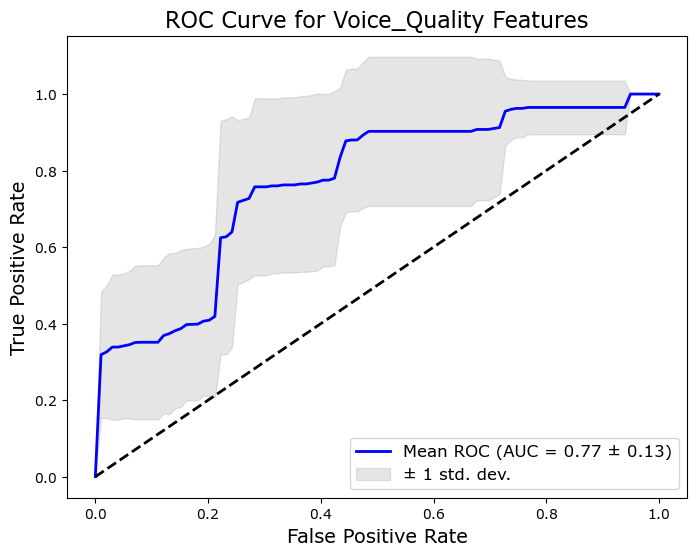

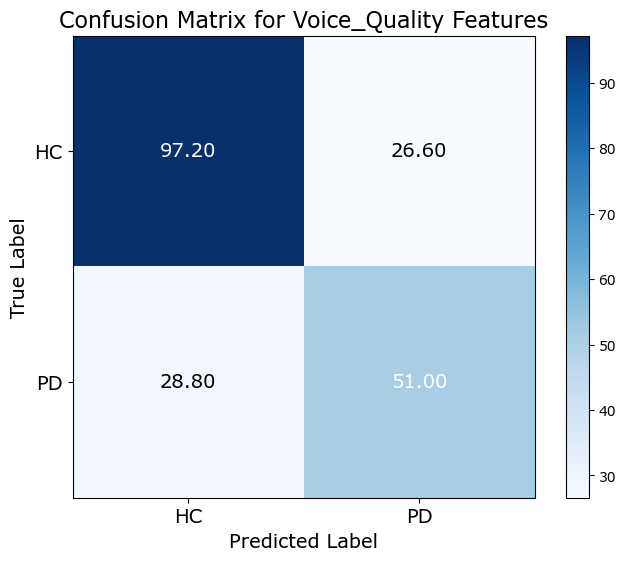

Selected Hyperparameters for All_Features:
Fold 1: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 18, 'n_estimators': 51}
Fold 2: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 9, 'min_samples_split': 16, 'n_estimators': 64}
Fold 3: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 16, 'min_samples_split': 9, 'n_estimators': 184}
Fold 4: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 363}
Fold 5: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 19, 'n_estimators': 409}
Mean Training Time for All_Features: 260.2844 seconds
Mean Testing Time for All_Features: 0.1544 seconds


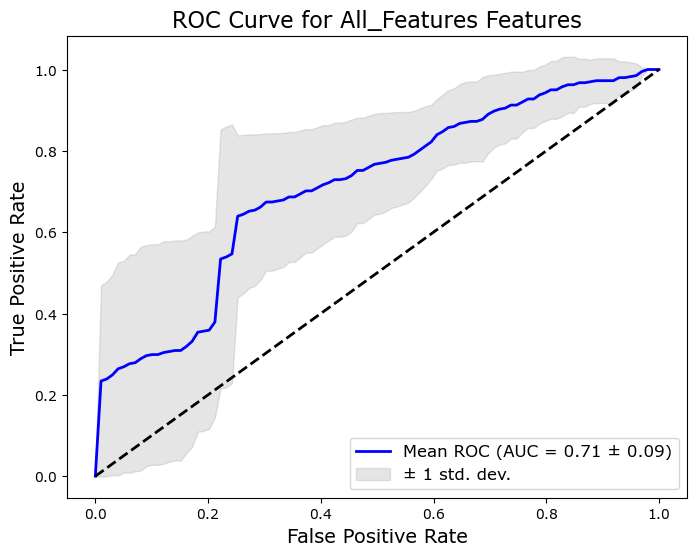

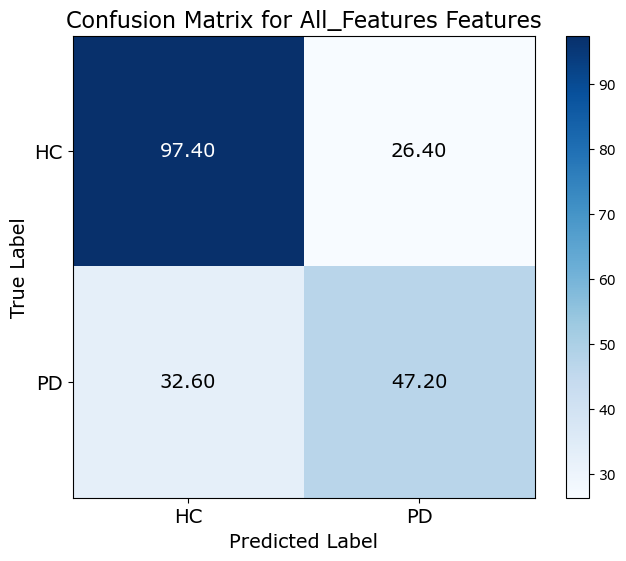

     Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.614962        0.514535     0.298006  0.363361   
1    Spectrogram       0.635458        0.540950     0.423038  0.469057   
2       Spectral       0.630552        0.548690     0.387943  0.445197   
3  Voice_Quality       0.727736        0.750817     0.639937  0.608604   
4   All_Features       0.710127        0.680879     0.591582  0.598769   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.626448  0.135267       0.644900          0.124725  0.385038  ...   
1      0.647933  0.205923       0.743805          0.201621  0.364542  ...   
2      0.610555  0.193212       0.702261          0.183962  0.369448  ...   
3      0.769135  0.465066       0.611913          0.419305  0.272264  ...   
4      0.709516  0.405537       0.602398          0.379801  0.289873  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.115994         0.057

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef, log_loss, cohen_kappa_score, mean_absolute_error, roc_curve
)
from scipy.stats import randint

# Load the CSV file with extracted features
csv_output_path = r'E:\DATASET MDVR IMG ALL\EXPERIMENT\Integeral\enhanced_integral_feature_data1.csv'
data = pd.read_csv(csv_output_path)

# Remove any rows with null values
data.dropna(inplace=True)

# Extract patient ID from file_name
def extract_patient_id(file_name):
    return file_name.split('_')[0]  # Extract the patient ID (e.g., ID00)

# Add a 'group' column based on patient ID
data['group'] = data['file_name'].apply(extract_patient_id)

# Define feature groups based on feature types
feature_groups = {
    'MFCC': ['mfcc_1', 'mfcc_delta_1', 'mfcc_delta2_1', 'mfcc_2', 'mfcc_delta_2', 'mfcc_delta2_2', 
             'mfcc_3', 'mfcc_delta_3', 'mfcc_delta2_3', 'mfcc_4', 'mfcc_delta_4', 'mfcc_delta2_4', 
             'mfcc_5', 'mfcc_delta_5', 'mfcc_delta2_5', 'mfcc_6', 'mfcc_delta_6', 'mfcc_delta2_6', 
             'mfcc_7', 'mfcc_delta_7', 'mfcc_delta2_7', 'mfcc_8', 'mfcc_delta_8', 'mfcc_delta2_8', 
             'mfcc_9', 'mfcc_delta_9', 'mfcc_delta2_9', 'mfcc_10', 'mfcc_delta_10', 'mfcc_delta2_10', 
             'mfcc_11', 'mfcc_delta_11', 'mfcc_delta2_11', 'mfcc_12', 'mfcc_delta_12', 'mfcc_delta2_12', 
             'mfcc_13', 'mfcc_delta_13', 'mfcc_delta2_13', 'entropy', 'kurtosis', 'skewness'],
    'Spectrogram': ['mel_spectrogram', 'chroma_stft', 'entropy', 'kurtosis', 'skewness'],
    'Spectral': ['rmse', 'spectral_contrast', 'spectral_flatness', 'spectral_centroid', 
                 'spectral_bandwidth', 'spectral_rolloff', 'zcr', 'entropy', 'kurtosis', 'skewness'],
    'Voice_Quality': ['jitter_local', 'shimmer_local', 'f0_mean', 'hnr', 'entropy', 'kurtosis', 'skewness']
}

# Add a new feature group that combines all features
feature_groups['All_Features'] = list(set().union(*[features for features in feature_groups.values()]))

# Parameter grid for RandomizedSearchCV (Random Forest)
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Store results for comparison
results = []

# Loop through each feature group
for group_name, features in feature_groups.items():
    X = data[features]
    y = data['label']
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=5)
    
    # Store metrics for each fold
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
        'mcc': [],
        'log_loss': [],
        'cohen_kappa': [],
        'mae': [],
        'specificity': [],
        'training_time': [],  # Store training time for each fold
        'testing_time': []   # Store testing time for each fold
    }
    
    # For ROC curve
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # For confusion matrix
    conf_matrices = []
    
    # For storing selected hyperparameters
    selected_params = []
    
    # Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Initialize the classifier with RandomizedSearchCV (Random Forest)
        clf = RandomForestClassifier(random_state=42)
        random_search = RandomizedSearchCV(
            estimator=clf, param_distributions=param_dist, n_iter=50,
            scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
        )
        
        # Measure training time
        start_train_time = time.time()
        random_search.fit(X_train, y_train)
        end_train_time = time.time()
        training_time = end_train_time - start_train_time
        fold_metrics['training_time'].append(training_time)
        
        best_clf = random_search.best_estimator_
        
        # Store selected hyperparameters
        selected_params.append(random_search.best_params_)
        
        # Measure testing time
        start_test_time = time.time()
        y_pred = best_clf.predict(X_val)
        y_pred_proba = best_clf.predict_proba(X_val)[:, 1]
        end_test_time = time.time()
        testing_time = end_test_time - start_test_time
        fold_metrics['testing_time'].append(testing_time)
        
        # Calculate performance metrics
        fold_metrics['accuracy'].append(accuracy_score(y_val, y_pred))
        fold_metrics['precision'].append(precision_score(y_val, y_pred))
        fold_metrics['recall'].append(recall_score(y_val, y_pred))
        fold_metrics['f1'].append(f1_score(y_val, y_pred))
        fold_metrics['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
        fold_metrics['mcc'].append(matthews_corrcoef(y_val, y_pred))
        fold_metrics['log_loss'].append(log_loss(y_val, y_pred_proba))
        fold_metrics['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))
        fold_metrics['mae'].append(mean_absolute_error(y_val, y_pred))
        
        # Calculate specificity
        conf_matrix = confusion_matrix(y_val, y_pred)
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        fold_metrics['specificity'].append(specificity)
        
        # Store confusion matrix
        conf_matrices.append(conf_matrix)
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_val, y_pred_proba))
    
    # Calculate mean and std dev of performance metrics
    mean_metrics = {k: np.mean(v) for k, v in fold_metrics.items()}
    std_metrics = {k: np.std(v) for k, v in fold_metrics.items()}
    
    # Store results for this feature group
    results.append({
        'Feature Set': group_name,
        **{f'Mean {k}': v for k, v in mean_metrics.items()},
        **{f'Std Dev {k}': v for k, v in std_metrics.items()},
        'Selected Hyperparameters': selected_params  # Add selected hyperparameters
    })
    
    # Print selected hyperparameters for this feature group
    print(f"Selected Hyperparameters for {group_name}:")
    for fold, params in enumerate(selected_params, 1):
        print(f"Fold {fold}: {params}")
    
    # Print mean training and testing time
    print(f"Mean Training Time for {group_name}: {mean_metrics['training_time']:.4f} seconds")
    print(f"Mean Testing Time for {group_name}: {mean_metrics['testing_time']:.4f} seconds")
    
    # Plot mean ROC curve with std dev
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)
    plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='grey', alpha=0.2, label='± 1 std. dev.')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {group_name} Features', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()
    
    # Plot mean confusion matrix with values
    mean_conf_matrix = np.mean(conf_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    plt.imshow(mean_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {group_name} Features', fontsize=16)
    plt.colorbar()
    plt.xticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.yticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    # Add text annotations for the confusion matrix values
    thresh = mean_conf_matrix.max() / 2.  # Threshold for text color
    for i in range(mean_conf_matrix.shape[0]):
        for j in range(mean_conf_matrix.shape[1]):
            plt.text(j, i, f"{mean_conf_matrix[i, j]:.2f}",
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if mean_conf_matrix[i, j] > thresh else "black",
                     fontsize=14)

    plt.show()

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('feature_comparison_results_with_DI_random_forest.csv', index=False)

In [4]:
import pandas as pd

# Define the path to the CSV file
csv_output_path = r'feature_comparison_results_with_DI_random_forest.csv'

# Load the data
data = pd.read_csv(csv_output_path)

data

Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.614962        0.514535     0.298006  0.363361   
1    Spectrogram       0.635458        0.540950     0.423038  0.469057   
2       Spectral       0.630552        0.548690     0.387943  0.445197   
3  Voice_Quality       0.727736        0.750817     0.639937  0.608604   
4   All_Features       0.710127        0.680879     0.591582  0.598769   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.626448  0.135267       0.644900          0.124725  0.385038  ...   
1      0.647933  0.205923       0.743805          0.201621  0.364542  ...   
2      0.610555  0.193212       0.702261          0.183962  0.369448  ...   
3      0.769135  0.465066       0.611913          0.419305  0.272264  ...   
4      0.709516  0.405537       0.602398          0.379801  0.289873  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.115994         0.057893     0.084975          0.030143   
1    0.098719         0.055297     0.106621          0.152514   
2    0.107943         0.066763     0.137486          0.096635   
3    0.243113         0.134763     0.304988          0.207711   
4    0.146521         0.088368     0.212434          0.101410   

   Std Dev cohen_kappa  Std Dev mae  Std Dev specificity  \
0             0.086241     0.033073             0.073978   
1             0.105809     0.043526             0.060104   
2             0.127877     0.059615             0.100076   
3             0.309700     0.148498             0.202900   
4             0.203382     0.094033             0.134731   

   Std Dev training_time  Std Dev testing_time  \
0               5.983952              0.086799   
1               2.595641              0.047717   
2               4.543044              0.058426   
3               2.643458              0.040057   
4              12.025004              0.100072   

                            Selected Hyperparameters  
0  [{'bootstrap': False, 'criterion': 'gini', 'ma...  
1  [{'bootstrap': True, 'criterion': 'entropy', '...  
2  [{'bootstrap': True, 'criterion': 'gini', 'max...  
3  [{'bootstrap': False, 'criterion': 'entropy', ...  
4  [{'bootstrap': True, 'criterion': 'entropy', '...  

[5 rows x 26 columns]

Selected Hyperparameters for MFCC:
Fold 1: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 17}
Fold 2: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 11}
Fold 3: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 18, 'min_samples_split': 13}
Fold 4: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'min_samples_split': 10}
Fold 5: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 18}
Fold 6: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 8}
Fold 7: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 18, 'min_samples_split': 13}
Fold 8: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split'

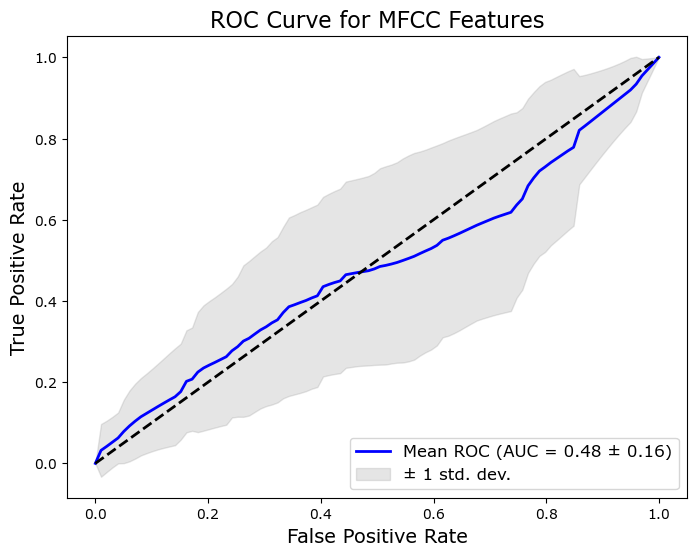

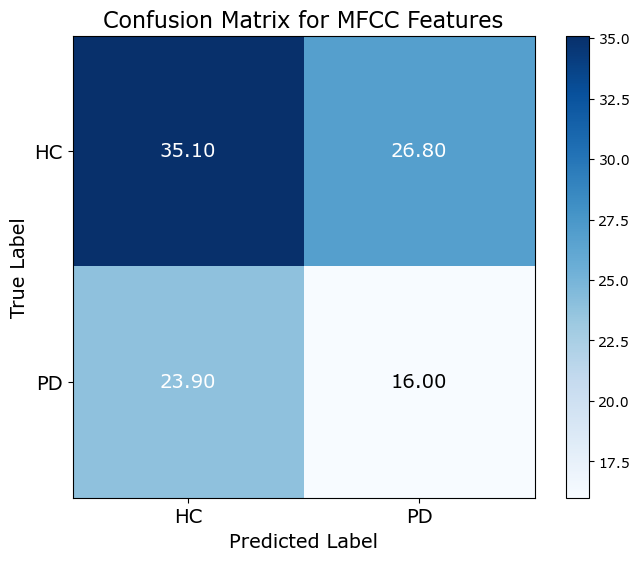

Selected Hyperparameters for Spectrogram:
Fold 1: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 18}
Fold 2: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 8}
Fold 3: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 18}
Fold 4: {'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 15}
Fold 5: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 17}
Fold 6: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 18}
Fold 7: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 16, 'min_samples_split': 17}
Fold 8: {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 13}
Fol

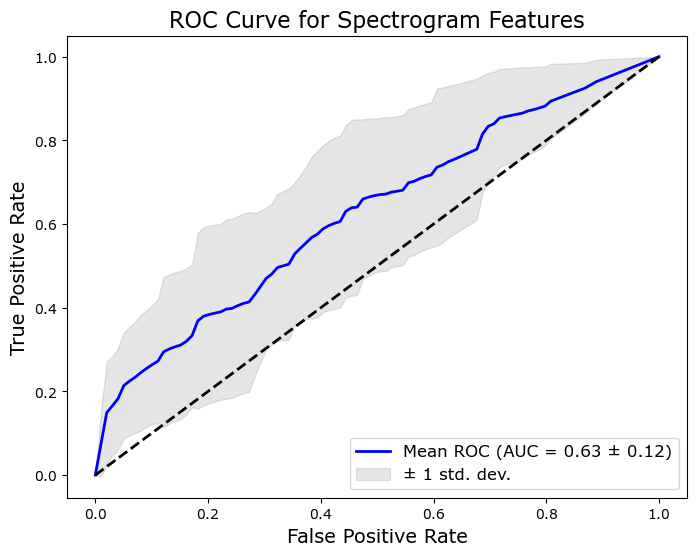

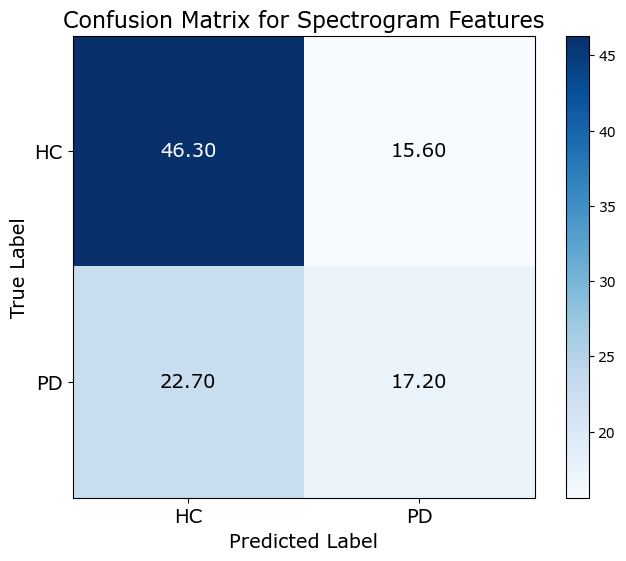

Selected Hyperparameters for Spectral:
Fold 1: {'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 9}
Fold 2: {'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 5}
Fold 3: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 16, 'min_samples_split': 17}
Fold 4: {'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 12}
Fold 5: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 17}
Fold 6: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 4}
Fold 7: {'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 5}
Fold 8: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 15}
Fold 9: {'criterion':

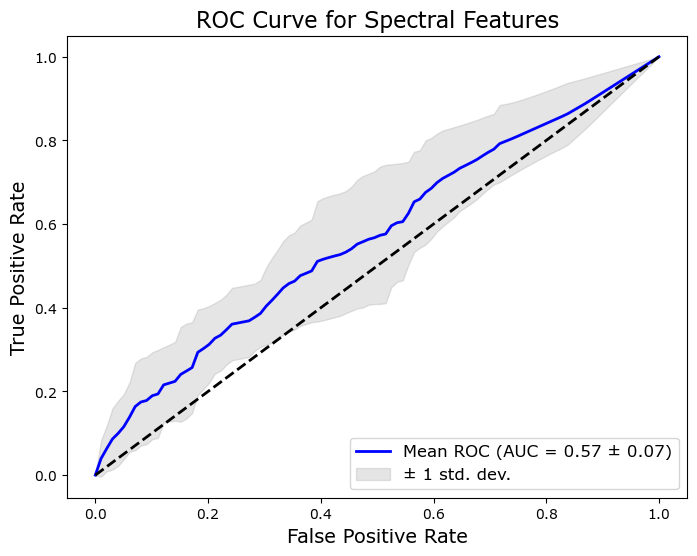

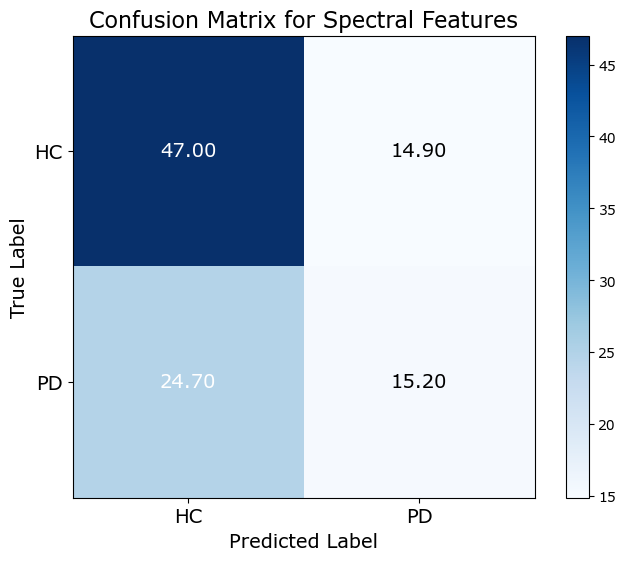

Selected Hyperparameters for Voice_Quality:
Fold 1: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6}
Fold 2: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Fold 3: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 17}
Fold 4: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 17, 'min_samples_split': 11}
Fold 5: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6}
Fold 6: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 8}
Fold 7: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Fold 8: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_sample

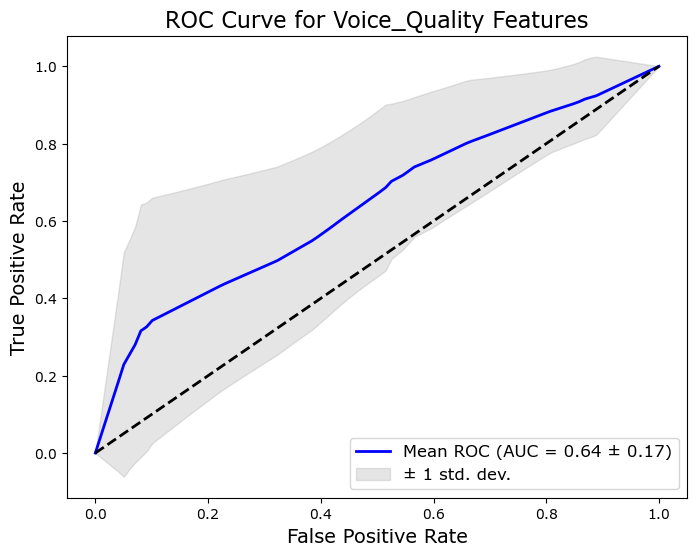

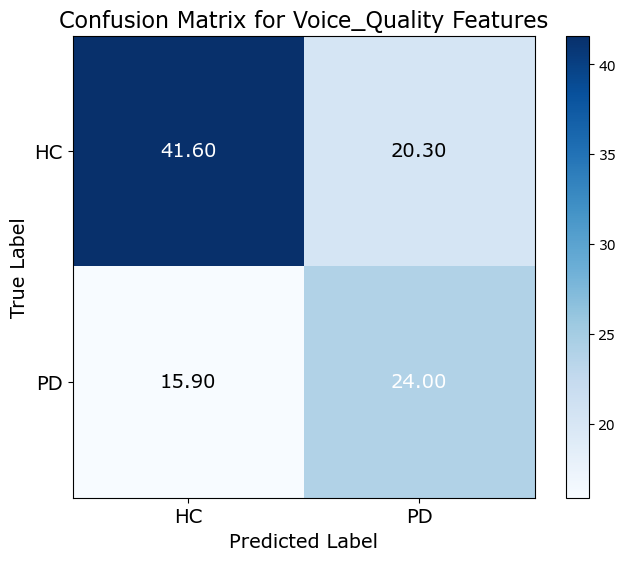

Selected Hyperparameters for All_Features:
Fold 1: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
Fold 2: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Fold 3: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 8}
Fold 4: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 8}
Fold 5: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 19}
Fold 6: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'min_samples_split': 10}
Fold 7: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'min_samples_split': 10}
Fold 8: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'm

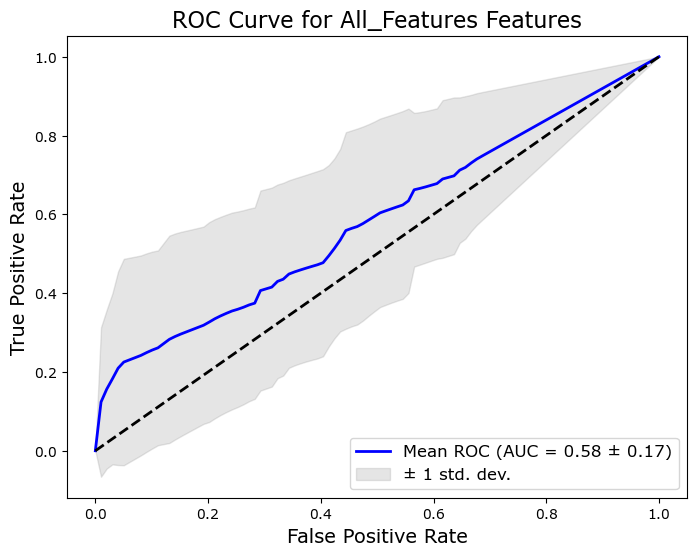

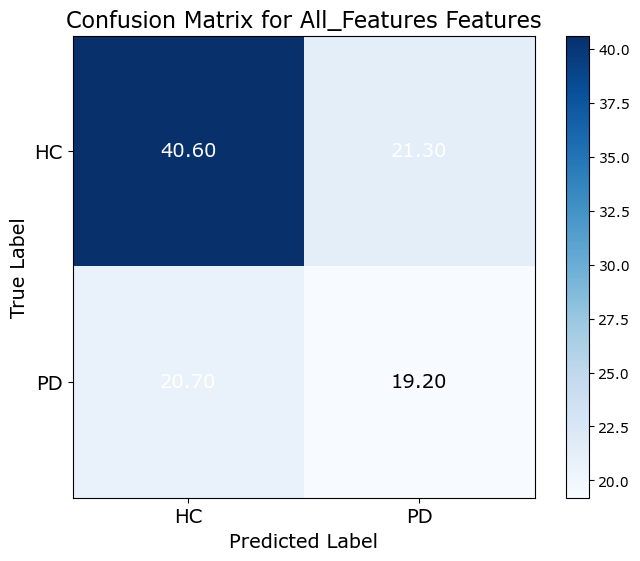

     Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.502194        0.378647     0.401474  0.384268   
1    Spectrogram       0.623675        0.533495     0.431218  0.463828   
2       Spectral       0.610901        0.511870     0.380897  0.426902   
3  Voice_Quality       0.644021        0.585714     0.601154  0.572286   
4   All_Features       0.587556        0.518128     0.481603  0.484418   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.483419 -0.029115       8.406004         -0.029921  0.497806  ...   
1      0.628616  0.191125       4.060162          0.183086  0.376325  ...   
2      0.571777  0.152947       5.502529          0.145848  0.389099  ...   
3      0.640615  0.293944      10.350776          0.275550  0.355979  ...   
4      0.583874  0.155742       9.413525          0.144572  0.412444  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.171667         0.164

In [8]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef, log_loss, cohen_kappa_score, mean_absolute_error, roc_curve
)
from scipy.stats import randint

# Load the CSV file with extracted features
csv_output_path = r'E:\DATASET MDVR IMG ALL\EXPERIMENT\Integeral\enhanced_integral_feature_data1.csv'
data = pd.read_csv(csv_output_path)

# Remove any rows with null values
data.dropna(inplace=True)



# Define feature groups based on feature types
feature_groups = {
    'MFCC': ['mfcc_1', 'mfcc_delta_1', 'mfcc_delta2_1', 'mfcc_2', 'mfcc_delta_2', 'mfcc_delta2_2', 
             'mfcc_3', 'mfcc_delta_3', 'mfcc_delta2_3', 'mfcc_4', 'mfcc_delta_4', 'mfcc_delta2_4', 
             'mfcc_5', 'mfcc_delta_5', 'mfcc_delta2_5', 'mfcc_6', 'mfcc_delta_6', 'mfcc_delta2_6', 
             'mfcc_7', 'mfcc_delta_7', 'mfcc_delta2_7', 'mfcc_8', 'mfcc_delta_8', 'mfcc_delta2_8', 
             'mfcc_9', 'mfcc_delta_9', 'mfcc_delta2_9', 'mfcc_10', 'mfcc_delta_10', 'mfcc_delta2_10', 
             'mfcc_11', 'mfcc_delta_11', 'mfcc_delta2_11', 'mfcc_12', 'mfcc_delta_12', 'mfcc_delta2_12', 
             'mfcc_13', 'mfcc_delta_13', 'mfcc_delta2_13', 'entropy', 'kurtosis', 'skewness'],
    'Spectrogram': ['mel_spectrogram', 'chroma_stft', 'entropy', 'kurtosis', 'skewness'],
    'Spectral': ['rmse', 'spectral_contrast', 'spectral_flatness', 'spectral_centroid', 
                 'spectral_bandwidth', 'spectral_rolloff', 'zcr', 'entropy', 'kurtosis', 'skewness'],
    'Voice_Quality': ['jitter_local', 'shimmer_local', 'f0_mean', 'hnr', 'entropy', 'kurtosis', 'skewness']
}

# Add a new feature group that combines all features
feature_groups['All_Features'] = list(set().union(*[features for features in feature_groups.values()]))

# Parameter grid for RandomizedSearchCV (Decision Tree)
param_dist = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for the best split
}

# Store results for comparison
results = []

# Loop through each feature group
for group_name, features in feature_groups.items():
    X = data[features]
    y = data['label']
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=10)
    
    # Store metrics for each fold
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
        'mcc': [],
        'log_loss': [],
        'cohen_kappa': [],
        'mae': [],
        'specificity': [],
        'training_time': [],  # Store training time for each fold
        'testing_time': []   # Store testing time for each fold
    }
    
    # For ROC curve
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # For confusion matrix
    conf_matrices = []
    
    # For storing selected hyperparameters
    selected_params = []
    
    # Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Initialize the classifier with RandomizedSearchCV (Decision Tree)
        clf = DecisionTreeClassifier(random_state=42)
        random_search = RandomizedSearchCV(
            estimator=clf, param_distributions=param_dist, n_iter=50,
            scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
        )
        
        # Measure training time
        start_train_time = time.time()
        random_search.fit(X_train, y_train)
        end_train_time = time.time()
        training_time = end_train_time - start_train_time
        fold_metrics['training_time'].append(training_time)
        
        best_clf = random_search.best_estimator_
        
        # Store selected hyperparameters
        selected_params.append(random_search.best_params_)
        
        # Measure testing time
        start_test_time = time.time()
        y_pred = best_clf.predict(X_val)
        y_pred_proba = best_clf.predict_proba(X_val)[:, 1]
        end_test_time = time.time()
        testing_time = end_test_time - start_test_time
        fold_metrics['testing_time'].append(testing_time)
        
        # Calculate performance metrics
        fold_metrics['accuracy'].append(accuracy_score(y_val, y_pred))
        fold_metrics['precision'].append(precision_score(y_val, y_pred))
        fold_metrics['recall'].append(recall_score(y_val, y_pred))
        fold_metrics['f1'].append(f1_score(y_val, y_pred))
        fold_metrics['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
        fold_metrics['mcc'].append(matthews_corrcoef(y_val, y_pred))
        fold_metrics['log_loss'].append(log_loss(y_val, y_pred_proba))
        fold_metrics['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))
        fold_metrics['mae'].append(mean_absolute_error(y_val, y_pred))
        
        # Calculate specificity
        conf_matrix = confusion_matrix(y_val, y_pred)
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        fold_metrics['specificity'].append(specificity)
        
        # Store confusion matrix
        conf_matrices.append(conf_matrix)
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_val, y_pred_proba))
    
    # Calculate mean and std dev of performance metrics
    mean_metrics = {k: np.mean(v) for k, v in fold_metrics.items()}
    std_metrics = {k: np.std(v) for k, v in fold_metrics.items()}
    
    # Store results for this feature group
    results.append({
        'Feature Set': group_name,
        **{f'Mean {k}': v for k, v in mean_metrics.items()},
        **{f'Std Dev {k}': v for k, v in std_metrics.items()},
        'Selected Hyperparameters': selected_params  # Add selected hyperparameters
    })
    
    # Print selected hyperparameters for this feature group
    print(f"Selected Hyperparameters for {group_name}:")
    for fold, params in enumerate(selected_params, 1):
        print(f"Fold {fold}: {params}")
    
    # Print mean training and testing time
    print(f"Mean Training Time for {group_name}: {mean_metrics['training_time']:.4f} seconds")
    print(f"Mean Testing Time for {group_name}: {mean_metrics['testing_time']:.4f} seconds")
    
    # Plot mean ROC curve with std dev
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)
    plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='grey', alpha=0.2, label='± 1 std. dev.')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {group_name} Features', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()
    
    # Plot mean confusion matrix with values
    mean_conf_matrix = np.mean(conf_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    plt.imshow(mean_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {group_name} Features', fontsize=16)
    plt.colorbar()
    plt.xticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.yticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    # Add text annotations for the confusion matrix values
    thresh = mean_conf_matrix.max() / 2.  # Threshold for text color
    for i in range(mean_conf_matrix.shape[0]):
        for j in range(mean_conf_matrix.shape[1]):
            plt.text(j, i, f"{mean_conf_matrix[i, j]:.2f}",
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if mean_conf_matrix[i, j] > thresh else "black",
                     fontsize=14)

    plt.show()

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('feature_comparison_results_with_DI_decision_tree.csv', index=False)

In [9]:
import pandas as pd

# Define the path to the CSV file
csv_output_path = r'feature_comparison_results_with_DI_decision_tree.csv'

# Load the data
data = pd.read_csv(csv_output_path)

data

Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.502194        0.378647     0.401474  0.384268   
1    Spectrogram       0.623675        0.533495     0.431218  0.463828   
2       Spectral       0.610901        0.511870     0.380897  0.426902   
3  Voice_Quality       0.644021        0.585714     0.601154  0.572286   
4   All_Features       0.587556        0.518128     0.481603  0.484418   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.483419 -0.029115       8.406004         -0.029921  0.497806  ...   
1      0.628616  0.191125       4.060162          0.183086  0.376325  ...   
2      0.571777  0.152947       5.502529          0.145848  0.389099  ...   
3      0.640615  0.293944      10.350776          0.275550  0.355979  ...   
4      0.583874  0.155742       9.413525          0.144572  0.412444  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.171667         0.164885     0.294439          4.766586   
1    0.148013         0.123455     0.217442          3.261987   
2    0.087934         0.069286     0.104153          2.096309   
3    0.175824         0.172615     0.319033          5.776006   
4    0.174861         0.166491     0.318754          5.070549   

   Std Dev cohen_kappa  Std Dev mae  Std Dev specificity  \
0             0.290143     0.144015             0.152354   
1             0.215156     0.100414             0.105935   
2             0.101170     0.047360             0.088666   
3             0.313951     0.162358             0.231867   
4             0.306156     0.153332             0.202109   

   Std Dev training_time  Std Dev testing_time  \
0               0.476815              0.009613   
1               0.287394              0.005102   
2               0.300103              0.009267   
3               0.252148              0.001202   
4               0.277071              0.006103   

                            Selected Hyperparameters  
0  [{'criterion': 'gini', 'max_depth': 10, 'max_f...  
1  [{'criterion': 'gini', 'max_depth': 10, 'max_f...  
2  [{'criterion': 'gini', 'max_depth': 50, 'max_f...  
3  [{'criterion': 'gini', 'max_depth': 30, 'max_f...  
4  [{'criterion': 'entropy', 'max_depth': 30, 'ma...  

[5 rows x 26 columns]

Selected Hyperparameters for MFCC:
Fold 1: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 264}
Fold 2: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 112}
Fold 3: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 493}
Fold 4: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 103}
Fold 5: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 178}
Mean Training Time for MFCC: 618.1400 seconds
Mean Testing Time for MFCC: 0.2985 seconds


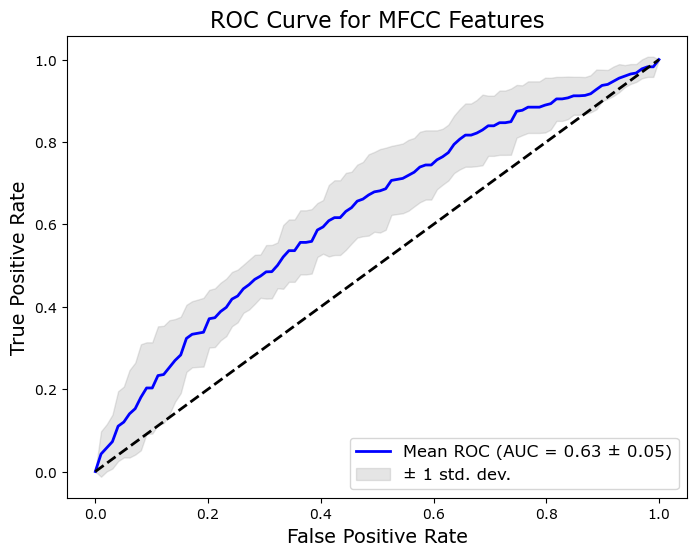

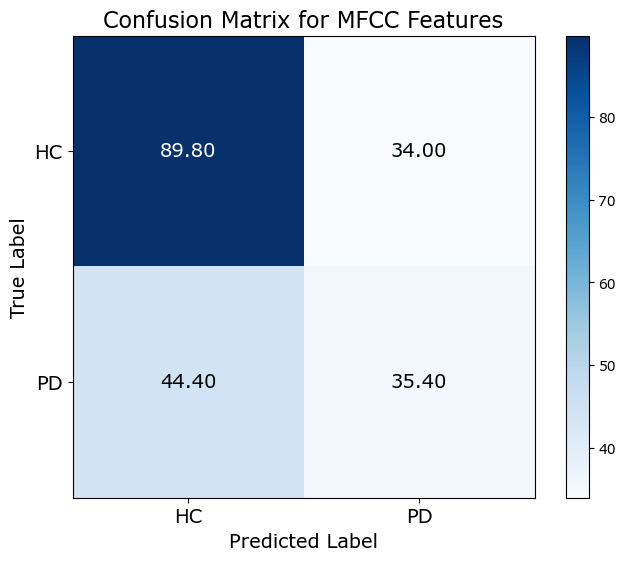

Selected Hyperparameters for Spectrogram:
Fold 1: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 216}
Fold 2: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 395}
Fold 3: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 237}
Fold 4: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 137}
Fold 5: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 108}
Mean Training Time for Spectrogram: 132.6140 seconds
Mean Testing Time for Spectrogram: 0.3332 seconds


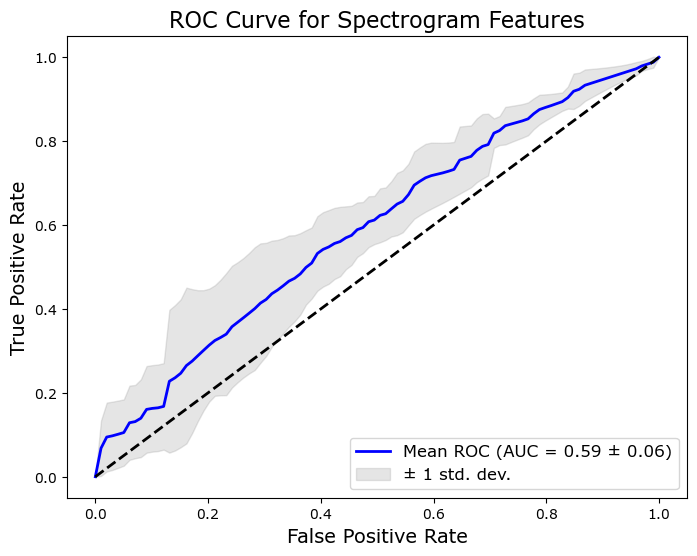

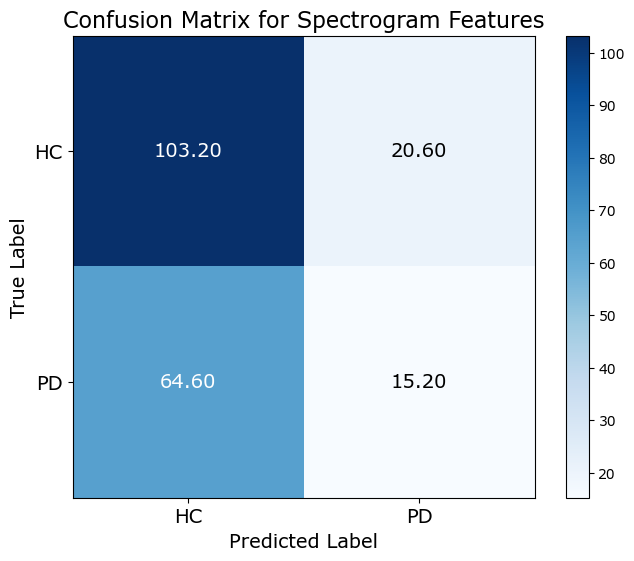

Selected Hyperparameters for Spectral:
Fold 1: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 285}
Fold 2: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 104}
Fold 3: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 216}
Fold 4: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 103}
Fold 5: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 395}
Mean Training Time for Spectral: 179.8232 seconds
Mean Testing Time for Spectral: 0.3230 seconds


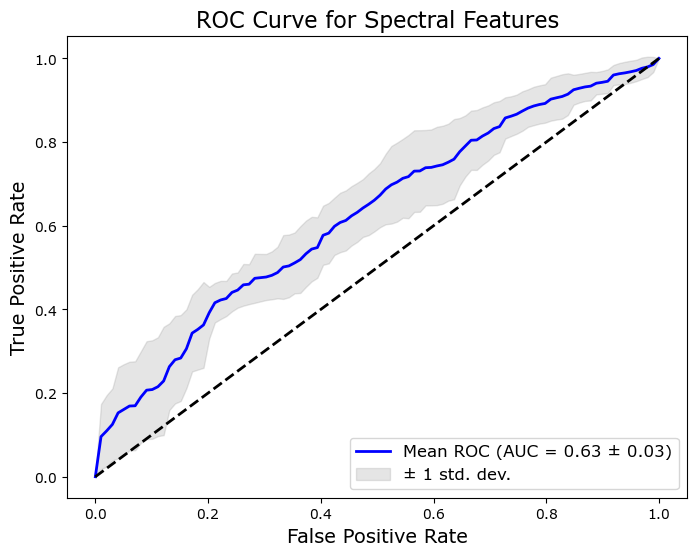

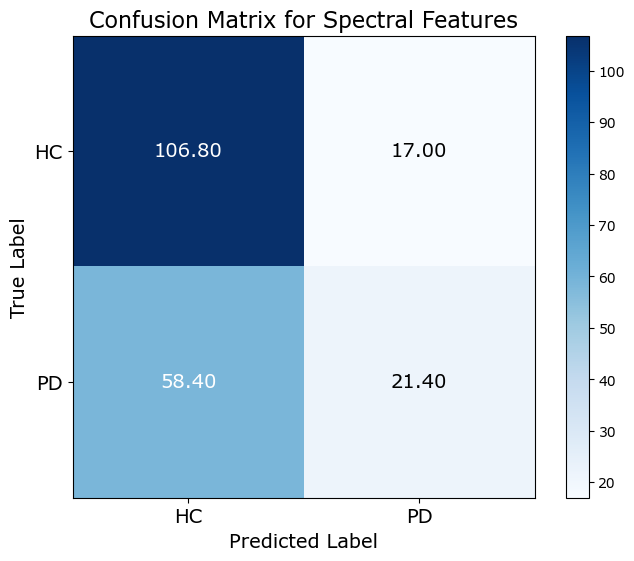

Selected Hyperparameters for Voice_Quality:
Fold 1: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 237}
Fold 2: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 395}
Fold 3: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 291}
Fold 4: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 104}
Fold 5: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 152}
Mean Training Time for Voice_Quality: 117.2070 seconds
Mean Testing Time for Voice_Quality: 0.2348 seconds


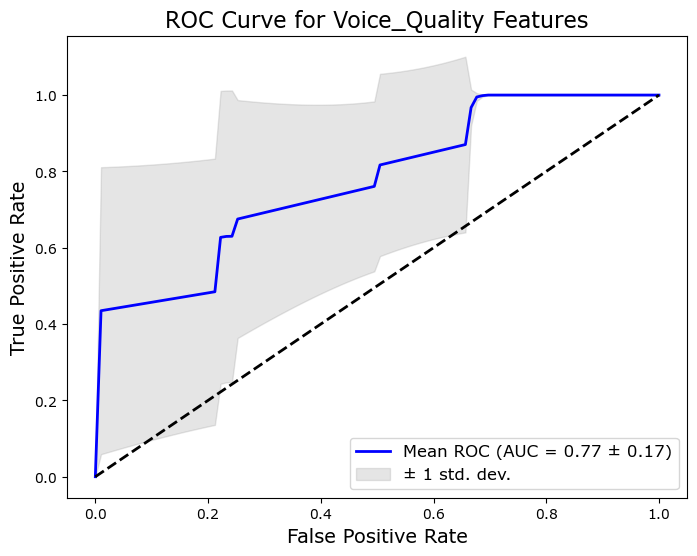

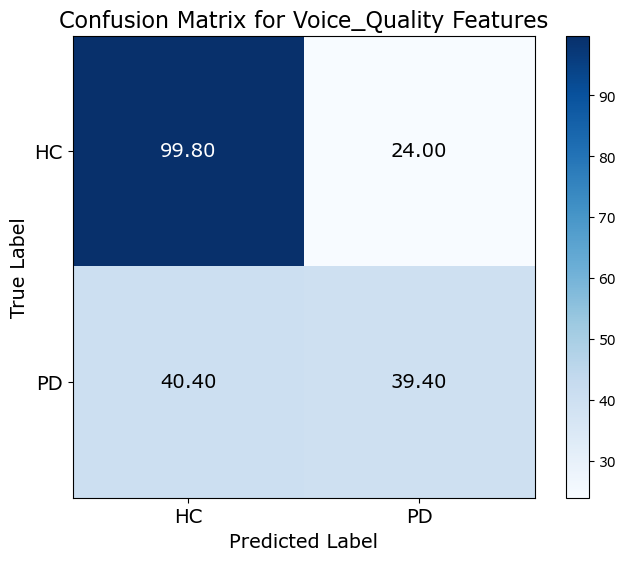

Selected Hyperparameters for All_Features:
Fold 1: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 103}
Fold 2: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 395}
Fold 3: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 51}
Fold 4: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 121}
Fold 5: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 152}
Mean Training Time for All_Features: 480.4218 seconds
Mean Testing Time for All_Features: 0.1968 seconds


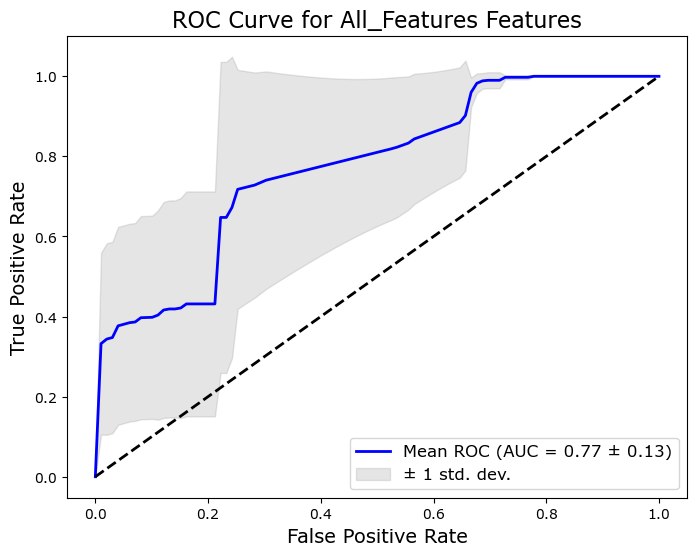

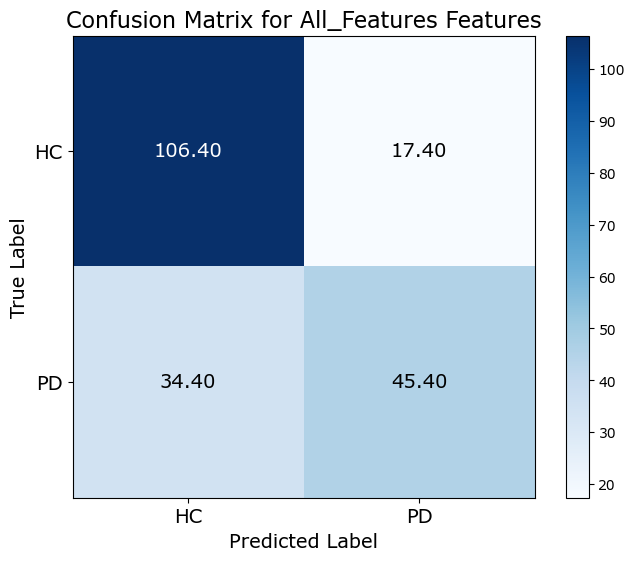

     Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.614923        0.508363     0.443101  0.465819   
1    Spectrogram       0.581517        0.393659     0.190506  0.248889   
2       Spectral       0.629644        0.574275     0.267880  0.350148   
3  Voice_Quality       0.683628        0.647053     0.494019  0.484161   
4   All_Features       0.745412        0.691923     0.570000  0.552093   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.625906  0.173748       0.685120          0.170817  0.385077  ...   
1      0.591724  0.020081       0.744641          0.024479  0.418483  ...   
2      0.626316  0.166943       0.671872          0.142219  0.370356  ...   
3      0.774117  0.327656       0.674224          0.295132  0.316372  ...   
4      0.774129  0.445632       0.665492          0.416427  0.254588  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.081675         0.050

In [10]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef, log_loss, cohen_kappa_score, mean_absolute_error, roc_curve
)
from scipy.stats import randint

# Load the CSV file with extracted features
csv_output_path = r'E:\DATASET MDVR IMG ALL\EXPERIMENT\Integeral\enhanced_integral_feature_data1.csv'
data = pd.read_csv(csv_output_path)

# Remove any rows with null values
data.dropna(inplace=True)

# Extract patient ID from file_name
def extract_patient_id(file_name):
    return file_name.split('_')[0]  # Extract the patient ID (e.g., ID00)

# Add a 'group' column based on patient ID
data['group'] = data['file_name'].apply(extract_patient_id)

# Define feature groups based on feature types
feature_groups = {
    'MFCC': ['mfcc_1', 'mfcc_delta_1', 'mfcc_delta2_1', 'mfcc_2', 'mfcc_delta_2', 'mfcc_delta2_2', 
             'mfcc_3', 'mfcc_delta_3', 'mfcc_delta2_3', 'mfcc_4', 'mfcc_delta_4', 'mfcc_delta2_4', 
             'mfcc_5', 'mfcc_delta_5', 'mfcc_delta2_5', 'mfcc_6', 'mfcc_delta_6', 'mfcc_delta2_6', 
             'mfcc_7', 'mfcc_delta_7', 'mfcc_delta2_7', 'mfcc_8', 'mfcc_delta_8', 'mfcc_delta2_8', 
             'mfcc_9', 'mfcc_delta_9', 'mfcc_delta2_9', 'mfcc_10', 'mfcc_delta_10', 'mfcc_delta2_10', 
             'mfcc_11', 'mfcc_delta_11', 'mfcc_delta2_11', 'mfcc_12', 'mfcc_delta_12', 'mfcc_delta2_12', 
             'mfcc_13', 'mfcc_delta_13', 'mfcc_delta2_13', 'entropy', 'kurtosis', 'skewness'],
    'Spectrogram': ['mel_spectrogram', 'chroma_stft', 'entropy', 'kurtosis', 'skewness'],
    'Spectral': ['rmse', 'spectral_contrast', 'spectral_flatness', 'spectral_centroid', 
                 'spectral_bandwidth', 'spectral_rolloff', 'zcr', 'entropy', 'kurtosis', 'skewness'],
    'Voice_Quality': ['jitter_local', 'shimmer_local', 'f0_mean', 'hnr', 'entropy', 'kurtosis', 'skewness']
}

# Add a new feature group that combines all features
feature_groups['All_Features'] = list(set().union(*[features for features in feature_groups.values()]))

# Parameter grid for RandomizedSearchCV (AdaBoost)
param_dist = {
    'n_estimators': randint(50, 500),  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # Boosting algorithm
}

# Store results for comparison
results = []

# Loop through each feature group
for group_name, features in feature_groups.items():
    X = data[features]
    y = data['label']
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=5)
    
    # Store metrics for each fold
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
        'mcc': [],
        'log_loss': [],
        'cohen_kappa': [],
        'mae': [],
        'specificity': [],
        'training_time': [],  # Store training time for each fold
        'testing_time': []   # Store testing time for each fold
    }
    
    # For ROC curve
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # For confusion matrix
    conf_matrices = []
    
    # For storing selected hyperparameters
    selected_params = []
    
    # Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Initialize the classifier with RandomizedSearchCV (AdaBoost)
        clf = AdaBoostClassifier(random_state=42)
        random_search = RandomizedSearchCV(
            estimator=clf, param_distributions=param_dist, n_iter=50,
            scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
        )
        
        # Measure training time
        start_train_time = time.time()
        random_search.fit(X_train, y_train)
        end_train_time = time.time()
        training_time = end_train_time - start_train_time
        fold_metrics['training_time'].append(training_time)
        
        best_clf = random_search.best_estimator_
        
        # Store selected hyperparameters
        selected_params.append(random_search.best_params_)
        
        # Measure testing time
        start_test_time = time.time()
        y_pred = best_clf.predict(X_val)
        y_pred_proba = best_clf.predict_proba(X_val)[:, 1]
        end_test_time = time.time()
        testing_time = end_test_time - start_test_time
        fold_metrics['testing_time'].append(testing_time)
        
        # Calculate performance metrics
        fold_metrics['accuracy'].append(accuracy_score(y_val, y_pred))
        fold_metrics['precision'].append(precision_score(y_val, y_pred))
        fold_metrics['recall'].append(recall_score(y_val, y_pred))
        fold_metrics['f1'].append(f1_score(y_val, y_pred))
        fold_metrics['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
        fold_metrics['mcc'].append(matthews_corrcoef(y_val, y_pred))
        fold_metrics['log_loss'].append(log_loss(y_val, y_pred_proba))
        fold_metrics['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))
        fold_metrics['mae'].append(mean_absolute_error(y_val, y_pred))
        
        # Calculate specificity
        conf_matrix = confusion_matrix(y_val, y_pred)
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        fold_metrics['specificity'].append(specificity)
        
        # Store confusion matrix
        conf_matrices.append(conf_matrix)
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_val, y_pred_proba))
    
    # Calculate mean and std dev of performance metrics
    mean_metrics = {k: np.mean(v) for k, v in fold_metrics.items()}
    std_metrics = {k: np.std(v) for k, v in fold_metrics.items()}
    
    # Store results for this feature group
    results.append({
        'Feature Set': group_name,
        **{f'Mean {k}': v for k, v in mean_metrics.items()},
        **{f'Std Dev {k}': v for k, v in std_metrics.items()},
        'Selected Hyperparameters': selected_params  # Add selected hyperparameters
    })
    
    # Print selected hyperparameters for this feature group
    print(f"Selected Hyperparameters for {group_name}:")
    for fold, params in enumerate(selected_params, 1):
        print(f"Fold {fold}: {params}")
    
    # Print mean training and testing time
    print(f"Mean Training Time for {group_name}: {mean_metrics['training_time']:.4f} seconds")
    print(f"Mean Testing Time for {group_name}: {mean_metrics['testing_time']:.4f} seconds")
    
    # Plot mean ROC curve with std dev
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)
    plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='grey', alpha=0.2, label='± 1 std. dev.')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {group_name} Features', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()
    
    # Plot mean confusion matrix with values
    mean_conf_matrix = np.mean(conf_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    plt.imshow(mean_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {group_name} Features', fontsize=16)
    plt.colorbar()
    plt.xticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.yticks([0, 1], ['HC', 'PD'], fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    # Add text annotations for the confusion matrix values
    thresh = mean_conf_matrix.max() / 2.  # Threshold for text color
    for i in range(mean_conf_matrix.shape[0]):
        for j in range(mean_conf_matrix.shape[1]):
            plt.text(j, i, f"{mean_conf_matrix[i, j]:.2f}",
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if mean_conf_matrix[i, j] > thresh else "black",
                     fontsize=14)

    plt.show()

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('feature_comparison_results_with_DI_adaboost.csv', index=False)

In [11]:
import pandas as pd

# Define the path to the CSV file
csv_output_path = r'feature_comparison_results_with_DI_adaboost.csv'

# Load the data
data = pd.read_csv(csv_output_path)

data

Feature Set  Mean accuracy  Mean precision  Mean recall   Mean f1  \
0           MFCC       0.614923        0.508363     0.443101  0.465819   
1    Spectrogram       0.581517        0.393659     0.190506  0.248889   
2       Spectral       0.629644        0.574275     0.267880  0.350148   
3  Voice_Quality       0.683628        0.647053     0.494019  0.484161   
4   All_Features       0.745412        0.691923     0.570000  0.552093   

   Mean roc_auc  Mean mcc  Mean log_loss  Mean cohen_kappa  Mean mae  ...  \
0      0.625906  0.173748       0.685120          0.170817  0.385077  ...   
1      0.591724  0.020081       0.744641          0.024479  0.418483  ...   
2      0.626316  0.166943       0.671872          0.142219  0.370356  ...   
3      0.774117  0.327656       0.674224          0.295132  0.316372  ...   
4      0.774129  0.445632       0.665492          0.416427  0.254588  ...   

   Std Dev f1  Std Dev roc_auc  Std Dev mcc  Std Dev log_loss  \
0    0.081675         0.050604     0.064904          0.007828   
1    0.143876         0.055557     0.168468          0.115040   
2    0.110663         0.032953     0.112132          0.007423   
3    0.324172         0.169107     0.396734          0.158701   
4    0.366979         0.128661     0.435659          0.157631   

   Std Dev cohen_kappa  Std Dev mae  Std Dev specificity  \
0             0.067182     0.025027             0.068767   
1             0.128409     0.048913             0.065770   
2             0.100912     0.040583             0.071014   
3             0.370438     0.156620             0.185924   
4             0.417616     0.168347             0.109161   

   Std Dev training_time  Std Dev testing_time  \
0             436.974725              0.209946   
1               6.331150              0.243370   
2               3.214593              0.176923   
3               6.321759              0.124475   
4              45.888554              0.157190   

                            Selected Hyperparameters  
0  [{'algorithm': 'SAMME.R', 'learning_rate': 0.5...  
1  [{'algorithm': 'SAMME', 'learning_rate': 0.01,...  
2  [{'algorithm': 'SAMME.R', 'learning_rate': 0.0...  
3  [{'algorithm': 'SAMME', 'learning_rate': 0.1, ...  
4  [{'algorithm': 'SAMME.R', 'learning_rate': 0.1...  

[5 rows x 26 columns]

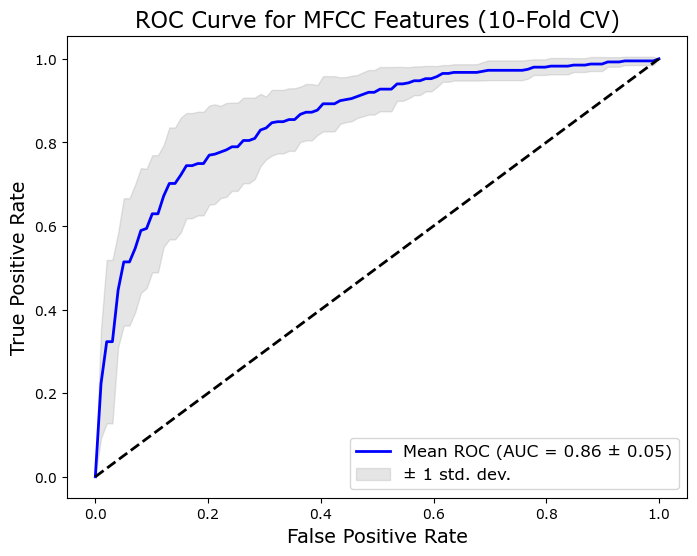

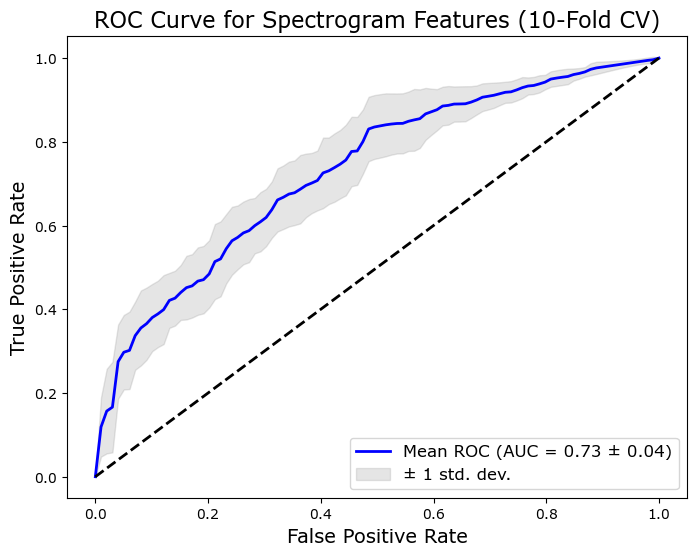

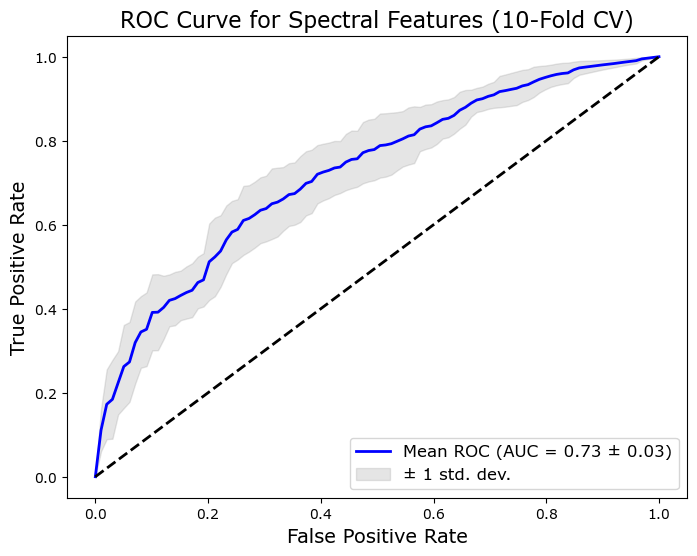

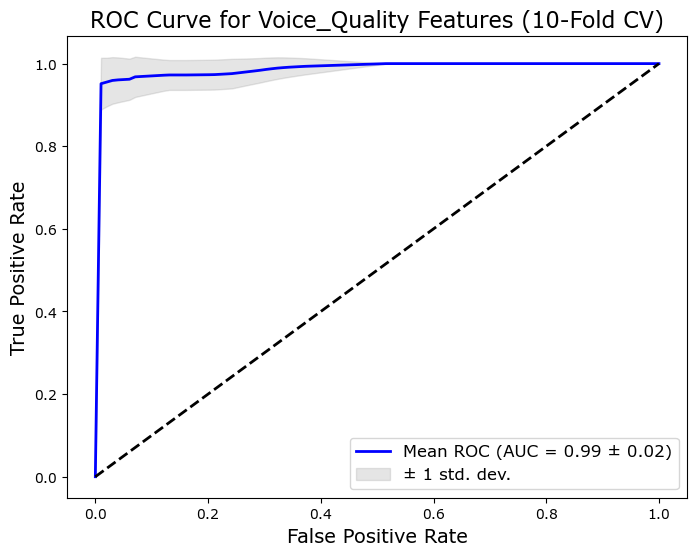

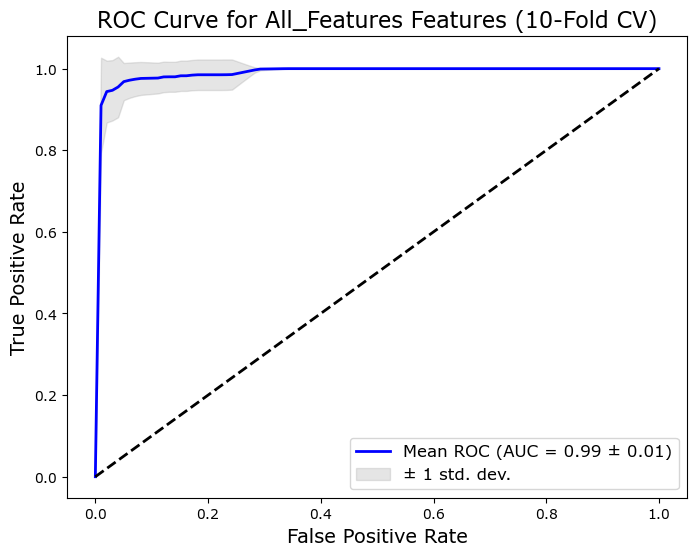

     Feature Set  80:20 accuracy  80:20 precision  80:20 recall  80:20 f1  \
0           MFCC        0.784314         0.743243        0.6875  0.714286   
1    Spectrogram        0.705882         0.651515        0.5375  0.589041   
2       Spectral        0.740196         0.736842        0.5250  0.613139   
3  Voice_Quality        1.000000         1.000000        1.0000  1.000000   
4   All_Features        1.000000         1.000000        1.0000  1.000000   

   80:20 roc_auc  80:20 mcc  80:20 log_loss  80:20 cohen_kappa  80:20 mae  \
0       0.854435   0.542541        0.684320           0.541479   0.215686   
1       0.734980   0.367373        0.632386           0.363296   0.294118   
2       0.772530   0.439618        0.681319           0.425749   0.259804   
3       1.000000   1.000000        0.549805           1.000000   0.000000   
4       1.000000   1.000000        0.551669           1.000000   0.000000   

   ...  10-Fold Std Dev f1  10-Fold Std Dev roc_auc  10-Fold Std Dev mcc  

In [12]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef, log_loss, cohen_kappa_score, mean_absolute_error, roc_curve
)
from scipy.stats import randint

# Load the CSV file with extracted features
csv_output_path = r'E:\DATASET MDVR IMG ALL\EXPERIMENT\Integeral\enhanced_integral_feature_data1.csv'
data = pd.read_csv(csv_output_path)

# Remove any rows with null values
data.dropna(inplace=True)



# Define feature groups based on feature types
feature_groups = {
    'MFCC': ['mfcc_1', 'mfcc_delta_1', 'mfcc_delta2_1', 'mfcc_2', 'mfcc_delta_2', 'mfcc_delta2_2', 
             'mfcc_3', 'mfcc_delta_3', 'mfcc_delta2_3', 'mfcc_4', 'mfcc_delta_4', 'mfcc_delta2_4', 
             'mfcc_5', 'mfcc_delta_5', 'mfcc_delta2_5', 'mfcc_6', 'mfcc_delta_6', 'mfcc_delta2_6', 
             'mfcc_7', 'mfcc_delta_7', 'mfcc_delta2_7', 'mfcc_8', 'mfcc_delta_8', 'mfcc_delta2_8', 
             'mfcc_9', 'mfcc_delta_9', 'mfcc_delta2_9', 'mfcc_10', 'mfcc_delta_10', 'mfcc_delta2_10', 
             'mfcc_11', 'mfcc_delta_11', 'mfcc_delta2_11', 'mfcc_12', 'mfcc_delta_12', 'mfcc_delta2_12', 
             'mfcc_13', 'mfcc_delta_13', 'mfcc_delta2_13', 'entropy', 'kurtosis', 'skewness'],
    'Spectrogram': ['mel_spectrogram', 'chroma_stft', 'entropy', 'kurtosis', 'skewness'],
    'Spectral': ['rmse', 'spectral_contrast', 'spectral_flatness', 'spectral_centroid', 
                 'spectral_bandwidth', 'spectral_rolloff', 'zcr', 'entropy', 'kurtosis', 'skewness'],
    'Voice_Quality': ['jitter_local', 'shimmer_local', 'f0_mean', 'hnr', 'entropy', 'kurtosis', 'skewness']
}

# Add a new feature group that combines all features
feature_groups['All_Features'] = list(set().union(*[features for features in feature_groups.values()]))

# Parameter grid for RandomizedSearchCV (AdaBoost)
param_dist = {
    'n_estimators': randint(50, 500),  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # Boosting algorithm
}

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred, y_pred_proba):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_pred_proba),
        'mcc': matthews_corrcoef(y_true, y_pred),
        'log_loss': log_loss(y_true, y_pred_proba),
        'cohen_kappa': cohen_kappa_score(y_true, y_pred),
        'mae': mean_absolute_error(y_true, y_pred),
        'specificity': confusion_matrix(y_true, y_pred)[0, 0] / (confusion_matrix(y_true, y_pred)[0, 0] + confusion_matrix(y_true, y_pred)[0, 1])
    }
    return metrics

# Function to evaluate model using 80:20 train-test split
def evaluate_80_20_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize the classifier with RandomizedSearchCV (AdaBoost)
    clf = AdaBoostClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=clf, param_distributions=param_dist, n_iter=50,
        scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
    )
    
    # Train the model
    start_train_time = time.time()
    random_search.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time
    
    best_clf = random_search.best_estimator_
    
    # Test the model
    start_test_time = time.time()
    y_pred = best_clf.predict(X_test)
    y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
    end_test_time = time.time()
    testing_time = end_test_time - start_test_time
    
    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba)
    metrics['training_time'] = training_time
    metrics['testing_time'] = testing_time
    
    return metrics, random_search.best_params_

# Function to evaluate model using 10-fold cross-validation
def evaluate_10_fold_cv(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
        'mcc': [],
        'log_loss': [],
        'cohen_kappa': [],
        'mae': [],
        'specificity': [],
        'training_time': [],
        'testing_time': []
    }
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Initialize the classifier with RandomizedSearchCV (AdaBoost)
        clf = AdaBoostClassifier(random_state=42)
        random_search = RandomizedSearchCV(
            estimator=clf, param_distributions=param_dist, n_iter=50,
            scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
        )
        
        # Train the model
        start_train_time = time.time()
        random_search.fit(X_train, y_train)
        end_train_time = time.time()
        training_time = end_train_time - start_train_time
        
        best_clf = random_search.best_estimator_
        
        # Test the model
        start_test_time = time.time()
        y_pred = best_clf.predict(X_val)
        y_pred_proba = best_clf.predict_proba(X_val)[:, 1]
        end_test_time = time.time()
        testing_time = end_test_time - start_test_time
        
        # Calculate performance metrics
        metrics = calculate_metrics(y_val, y_pred, y_pred_proba)
        for key in metrics:
            fold_metrics[key].append(metrics[key])
        fold_metrics['training_time'].append(training_time)
        fold_metrics['testing_time'].append(testing_time)
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_val, y_pred_proba))
    
    # Calculate mean and std dev of performance metrics
    mean_metrics = {k: np.mean(v) for k, v in fold_metrics.items()}
    std_metrics = {k: np.std(v) for k, v in fold_metrics.items()}
    
    return mean_metrics, std_metrics, tprs, aucs, mean_fpr

# Store results for comparison
results = []

# Loop through each feature group
for group_name, features in feature_groups.items():
    X = data[features]
    y = data['label']
    
    # Evaluate using 80:20 train-test split
    metrics_80_20, best_params_80_20 = evaluate_80_20_split(X, y)
    
    # Evaluate using 10-fold cross-validation
    mean_metrics_10_fold, std_metrics_10_fold, tprs, aucs, mean_fpr = evaluate_10_fold_cv(X, y)
    
    # Store results for this feature group
    results.append({
        'Feature Set': group_name,
        **{f'80:20 {k}': v for k, v in metrics_80_20.items()},
        **{f'10-Fold Mean {k}': v for k, v in mean_metrics_10_fold.items()},
        **{f'10-Fold Std Dev {k}': v for k, v in std_metrics_10_fold.items()},
        'Best Params 80:20': best_params_80_20
    })
    
    # Plot mean ROC curve for 10-fold CV
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)
    plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='grey', alpha=0.2, label='± 1 std. dev.')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {group_name} Features (10-Fold CV)', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('feature_comparison_results_with_80_20_and_10_fold.csv', index=False)

In [13]:
import pandas as pd

# Define the path to the CSV file
csv_output_path = r'feature_comparison_results_with_80_20_and_10_fold.csv'

# Load the data
data = pd.read_csv(csv_output_path)

data

Feature Set  80:20 accuracy  80:20 precision  80:20 recall  80:20 f1  \
0           MFCC        0.784314         0.743243        0.6875  0.714286   
1    Spectrogram        0.705882         0.651515        0.5375  0.589041   
2       Spectral        0.740196         0.736842        0.5250  0.613139   
3  Voice_Quality        1.000000         1.000000        1.0000  1.000000   
4   All_Features        1.000000         1.000000        1.0000  1.000000   

   80:20 roc_auc  80:20 mcc  80:20 log_loss  80:20 cohen_kappa  80:20 mae  \
0       0.854435   0.542541        0.684320           0.541479   0.215686   
1       0.734980   0.367373        0.632386           0.363296   0.294118   
2       0.772530   0.439618        0.681319           0.425749   0.259804   
3       1.000000   1.000000        0.549805           1.000000   0.000000   
4       1.000000   1.000000        0.551669           1.000000   0.000000   

   ...  10-Fold Std Dev f1  10-Fold Std Dev roc_auc  10-Fold Std Dev mcc  \
0  ...            0.073899                 0.051274             0.121224   
1  ...            0.166816                 0.039562             0.095099   
2  ...            0.095108                 0.032744             0.085773   
3  ...            0.036031                 0.015200             0.050635   
4  ...            0.037285                 0.012176             0.058149   

   10-Fold Std Dev log_loss  10-Fold Std Dev cohen_kappa  10-Fold Std Dev mae  \
0                  0.023585                     0.120273             0.057388   
1                  0.016053                     0.112481             0.035853   
2                  0.023537                     0.089836             0.033866   
3                  0.016264                     0.054935             0.025179   
4                  0.027523                     0.059398             0.027845   

   10-Fold Std Dev specificity  10-Fold Std Dev training_time  \
0                     0.059793                     228.443581   
1                     0.090777                     541.327088   
2                     0.029960                      12.873463   
3                     0.000000                       3.334545   
4                     0.016209                      24.412431   

   10-Fold Std Dev testing_time  \
0                      0.174484   
1                      0.121118   
2                      0.187153   
3                      0.216038   
4                      0.121263   

                                   Best Params 80:20  
0  {'algorithm': 'SAMME.R', 'learning_rate': 0.5,...  
1  {'algorithm': 'SAMME', 'learning_rate': 1.0, '...  
2  {'algorithm': 'SAMME.R', 'learning_rate': 0.1,...  
3  {'algorithm': 'SAMME', 'learning_rate': 1.0, '...  
4  {'algorithm': 'SAMME', 'learning_rate': 1.0, '...  

[5 rows x 38 columns]

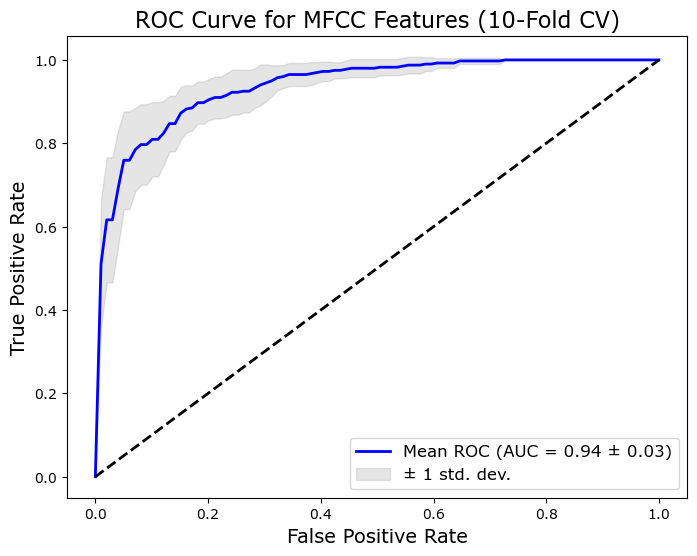

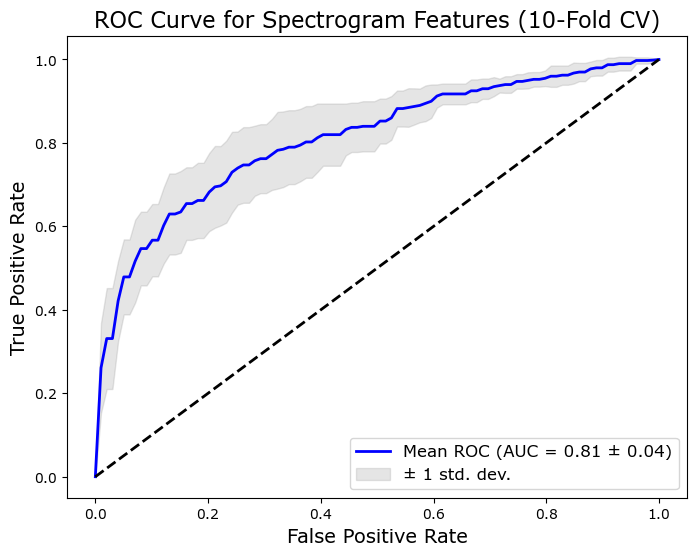

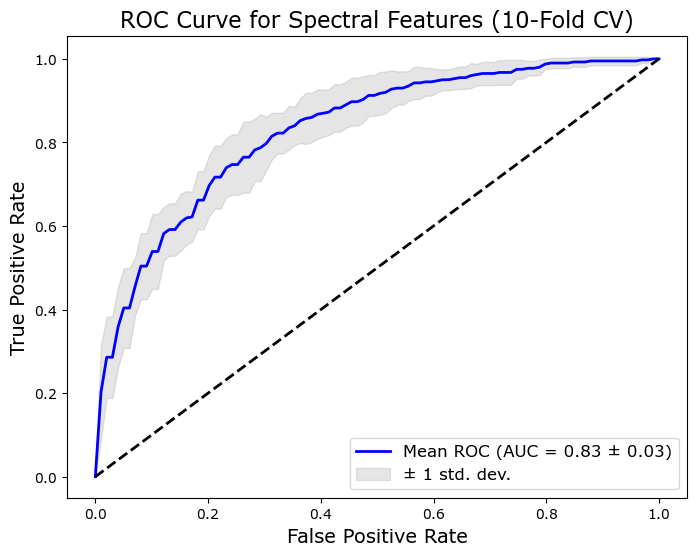

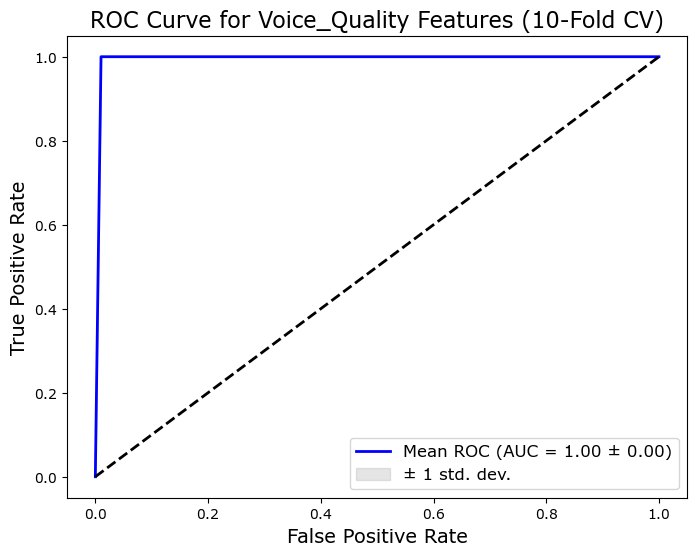

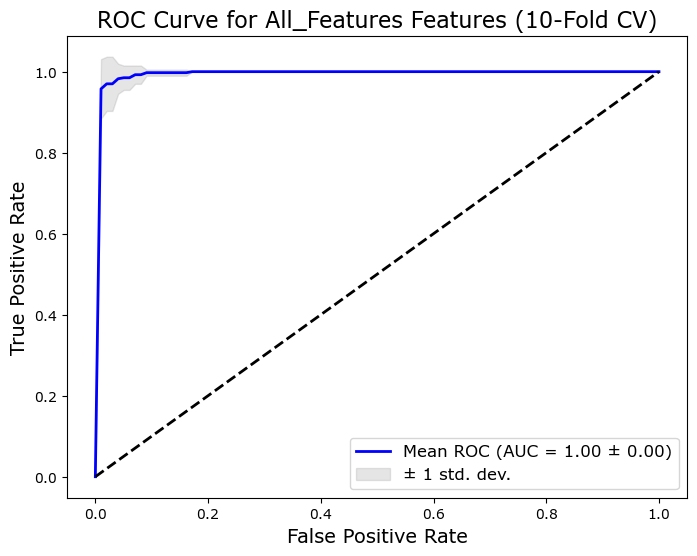

     Feature Set  80:20 accuracy  80:20 precision  80:20 recall  80:20 f1  \
0           MFCC        0.892157         0.914286        0.8000  0.853333   
1    Spectrogram        0.784314         0.736842        0.7000  0.717949   
2       Spectral        0.808824         0.836066        0.6375  0.723404   
3  Voice_Quality        1.000000         1.000000        1.0000  1.000000   
4   All_Features        0.990196         0.987500        0.9875  0.987500   

   80:20 roc_auc  80:20 mcc  80:20 log_loss  80:20 cohen_kappa  80:20 mae  \
0       0.956250   0.772945        0.382231           0.768660   0.107843   
1       0.842641   0.544000        0.485282           0.543531   0.215686   
2       0.874093   0.593834        0.448036           0.581351   0.191176   
3       1.000000   1.000000        0.000514           1.000000   0.000000   
4       0.999395   0.979435        0.129383           0.979435   0.009804   

   ...  10-Fold Std Dev f1  10-Fold Std Dev roc_auc  10-Fold Std Dev mcc  

In [14]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef, log_loss, cohen_kappa_score, mean_absolute_error, roc_curve
)
from scipy.stats import randint

# Load the CSV file with extracted features
csv_output_path = r'E:\DATASET MDVR IMG ALL\EXPERIMENT\Integeral\enhanced_integral_feature_data1.csv'
data = pd.read_csv(csv_output_path)

# Remove any rows with null values
data.dropna(inplace=True)

# Define feature groups based on feature types
feature_groups = {
    'MFCC': ['mfcc_1', 'mfcc_delta_1', 'mfcc_delta2_1', 'mfcc_2', 'mfcc_delta_2', 'mfcc_delta2_2', 
             'mfcc_3', 'mfcc_delta_3', 'mfcc_delta2_3', 'mfcc_4', 'mfcc_delta_4', 'mfcc_delta2_4', 
             'mfcc_5', 'mfcc_delta_5', 'mfcc_delta2_5', 'mfcc_6', 'mfcc_delta_6', 'mfcc_delta2_6', 
             'mfcc_7', 'mfcc_delta_7', 'mfcc_delta2_7', 'mfcc_8', 'mfcc_delta_8', 'mfcc_delta2_8', 
             'mfcc_9', 'mfcc_delta_9', 'mfcc_delta2_9', 'mfcc_10', 'mfcc_delta_10', 'mfcc_delta2_10', 
             'mfcc_11', 'mfcc_delta_11', 'mfcc_delta2_11', 'mfcc_12', 'mfcc_delta_12', 'mfcc_delta2_12', 
             'mfcc_13', 'mfcc_delta_13', 'mfcc_delta2_13', 'entropy', 'kurtosis', 'skewness'],
    'Spectrogram': ['mel_spectrogram', 'chroma_stft', 'entropy', 'kurtosis', 'skewness'],
    'Spectral': ['rmse', 'spectral_contrast', 'spectral_flatness', 'spectral_centroid', 
                 'spectral_bandwidth', 'spectral_rolloff', 'zcr', 'entropy', 'kurtosis', 'skewness'],
    'Voice_Quality': ['jitter_local', 'shimmer_local', 'f0_mean', 'hnr', 'entropy', 'kurtosis', 'skewness']
}

# Add a new feature group that combines all features
feature_groups['All_Features'] = list(set().union(*[features for features in feature_groups.values()]))

# Parameter grid for RandomizedSearchCV (Random Forest)
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50, 100],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether to bootstrap samples
}

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred, y_pred_proba):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_pred_proba),
        'mcc': matthews_corrcoef(y_true, y_pred),
        'log_loss': log_loss(y_true, y_pred_proba),
        'cohen_kappa': cohen_kappa_score(y_true, y_pred),
        'mae': mean_absolute_error(y_true, y_pred),
        'specificity': confusion_matrix(y_true, y_pred)[0, 0] / (confusion_matrix(y_true, y_pred)[0, 0] + confusion_matrix(y_true, y_pred)[0, 1])
    }
    return metrics

# Function to evaluate model using 80:20 train-test split
def evaluate_80_20_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize the classifier with RandomizedSearchCV (Random Forest)
    clf = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=clf, param_distributions=param_dist, n_iter=50,
        scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
    )
    
    # Train the model
    start_train_time = time.time()
    random_search.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time
    
    best_clf = random_search.best_estimator_
    
    # Test the model
    start_test_time = time.time()
    y_pred = best_clf.predict(X_test)
    y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
    end_test_time = time.time()
    testing_time = end_test_time - start_test_time
    
    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba)
    metrics['training_time'] = training_time
    metrics['testing_time'] = testing_time
    
    return metrics, random_search.best_params_

# Function to evaluate model using 10-fold cross-validation
def evaluate_10_fold_cv(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
        'mcc': [],
        'log_loss': [],
        'cohen_kappa': [],
        'mae': [],
        'specificity': [],
        'training_time': [],
        'testing_time': []
    }
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Initialize the classifier with RandomizedSearchCV (Random Forest)
        clf = RandomForestClassifier(random_state=42)
        random_search = RandomizedSearchCV(
            estimator=clf, param_distributions=param_dist, n_iter=50,
            scoring='accuracy', cv=5, verbose=0, random_state=42, n_jobs=-1
        )
        
        # Train the model
        start_train_time = time.time()
        random_search.fit(X_train, y_train)
        end_train_time = time.time()
        training_time = end_train_time - start_train_time
        
        best_clf = random_search.best_estimator_
        
        # Test the model
        start_test_time = time.time()
        y_pred = best_clf.predict(X_val)
        y_pred_proba = best_clf.predict_proba(X_val)[:, 1]
        end_test_time = time.time()
        testing_time = end_test_time - start_test_time
        
        # Calculate performance metrics
        metrics = calculate_metrics(y_val, y_pred, y_pred_proba)
        for key in metrics:
            fold_metrics[key].append(metrics[key])
        fold_metrics['training_time'].append(training_time)
        fold_metrics['testing_time'].append(testing_time)
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_val, y_pred_proba))
    
    # Calculate mean and std dev of performance metrics
    mean_metrics = {k: np.mean(v) for k, v in fold_metrics.items()}
    std_metrics = {k: np.std(v) for k, v in fold_metrics.items()}
    
    return mean_metrics, std_metrics, tprs, aucs, mean_fpr

# Store results for comparison
results = []

# Loop through each feature group
for group_name, features in feature_groups.items():
    X = data[features]
    y = data['label']
    
    # Evaluate using 80:20 train-test split
    metrics_80_20, best_params_80_20 = evaluate_80_20_split(X, y)
    
    # Evaluate using 10-fold cross-validation
    mean_metrics_10_fold, std_metrics_10_fold, tprs, aucs, mean_fpr = evaluate_10_fold_cv(X, y)
    
    # Store results for this feature group
    results.append({
        'Feature Set': group_name,
        **{f'80:20 {k}': v for k, v in metrics_80_20.items()},
        **{f'10-Fold Mean {k}': v for k, v in mean_metrics_10_fold.items()},
        **{f'10-Fold Std Dev {k}': v for k, v in std_metrics_10_fold.items()},
        'Best Params 80:20': best_params_80_20
    })
    
    # Plot mean ROC curve for 10-fold CV
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)
    plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='grey', alpha=0.2, label='± 1 std. dev.')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {group_name} Features (10-Fold CV)', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('feature_comparison_results_with_80_20_and_10_fold_RF.csv', index=False)

In [15]:
import pandas as pd

# Define the path to the CSV file
csv_output_path = r'feature_comparison_results_with_80_20_and_10_fold_RF.csv'

# Load the data
data = pd.read_csv(csv_output_path)

data

Feature Set  80:20 accuracy  80:20 precision  80:20 recall  80:20 f1  \
0           MFCC        0.892157         0.914286        0.8000  0.853333   
1    Spectrogram        0.784314         0.736842        0.7000  0.717949   
2       Spectral        0.808824         0.836066        0.6375  0.723404   
3  Voice_Quality        1.000000         1.000000        1.0000  1.000000   
4   All_Features        0.990196         0.987500        0.9875  0.987500   

   80:20 roc_auc  80:20 mcc  80:20 log_loss  80:20 cohen_kappa  80:20 mae  \
0       0.956250   0.772945        0.382231           0.768660   0.107843   
1       0.842641   0.544000        0.485282           0.543531   0.215686   
2       0.874093   0.593834        0.448036           0.581351   0.191176   
3       1.000000   1.000000        0.000514           1.000000   0.000000   
4       0.999395   0.979435        0.129383           0.979435   0.009804   

   ...  10-Fold Std Dev f1  10-Fold Std Dev roc_auc  10-Fold Std Dev mcc  \
0  ...            0.082627                 0.026475             0.083955   
1  ...            0.072026                 0.042982             0.102984   
2  ...            0.050938                 0.028227             0.058940   
3  ...            0.019711                 0.000000             0.029756   
4  ...            0.030657                 0.004337             0.048459   

   10-Fold Std Dev log_loss  10-Fold Std Dev cohen_kappa  10-Fold Std Dev mae  \
0                  0.048182                     0.101375             0.041942   
1                  0.042099                     0.102809             0.046349   
2                  0.033177                     0.061778             0.025983   
3                  0.038839                     0.031156             0.014542   
4                  0.050799                     0.049688             0.023528   

   10-Fold Std Dev specificity  10-Fold Std Dev training_time  \
0                     0.023122                      69.618218   
1                     0.047117                       1.112366   
2                     0.038654                       1.163946   
3                     0.000000                       0.319209   
4                     0.019729                       7.440888   

   10-Fold Std Dev testing_time  \
0                      0.065950   
1                      0.012939   
2                      0.017139   
3                      0.004854   
4                      0.011853   

                                   Best Params 80:20  
0  {'bootstrap': False, 'max_depth': 30, 'max_fea...  
1  {'bootstrap': True, 'max_depth': 50, 'max_feat...  
2  {'bootstrap': False, 'max_depth': None, 'max_f...  
3  {'bootstrap': True, 'max_depth': 30, 'max_feat...  
4  {'bootstrap': False, 'max_depth': 30, 'max_fea...  

[5 rows x 38 columns]